#### Exploratory Data Analysis (EDA)
- Descriptive Statistics: Analyze basic statistics, such as the number of unique items, average transaction size, and frequency of items.
- Visualizations: Use visualizations like histograms or bar charts to understand item popularity and transaction patterns.

In [1]:
import pandas as pd 
import numpy as np

from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')

import math
from sklearn import preprocessing

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.cm as cm

import plotly as py
import plotly.graph_objs as go

In [2]:
df = pd.read_csv("OnlineRetail.csv", encoding='unicode_escape')
df.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
# We can suffer from empty customerIDs, that just means the customer doesn't have an account

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

Overview

In [6]:
df.describe().transpose()

count          mean          std       min       25%       50%  \
Quantity    541909.0      9.552250   218.081158 -80995.00      1.00      3.00   
UnitPrice   541909.0      4.611114    96.759853 -11062.06      1.25      2.08   
CustomerID  406829.0  15287.690570  1713.600303  12346.00  13953.00  15152.00   

                 75%      max  
Quantity       10.00  80995.0  
UnitPrice       4.13  38970.0  
CustomerID  16791.00  18287.0

In [7]:
print("Unique value counts:")
for col in df:
    print("Col {}: {}".format(col, len(df[col].unique())))

Unique value counts:
Col InvoiceNo: 25900
Col StockCode: 4070
Col Description: 4224
Col Quantity: 722
Col InvoiceDate: 23260
Col UnitPrice: 1630
Col CustomerID: 4373
Col Country: 38


In [8]:
df[df['Quantity'] < 0].head(10)

InvoiceNo StockCode                        Description  Quantity  \
141   C536379         D                           Discount        -1   
154   C536383    35004C    SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556     PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984   PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983   PACK OF 12 BLUE PAISLEY TISSUES        -24   
238   C536391     21980  PACK OF 12 RED RETROSPOT TISSUES        -24   
239   C536391     21484        CHICK GREY HOT WATER BOTTLE       -12   
240   C536391     22557   PLASTERS IN TIN VINTAGE PAISLEY        -12   
241   C536391     22553             PLASTERS IN TIN SKULLS       -24   
939   C536506     22960           JAM MAKING SET WITH JARS        -6   

         InvoiceDate  UnitPrice  CustomerID         Country  
141   12/1/2010 9:41      27.50     14527.0  United Kingdom  
154   12/1/2010 9:49       4.65     15311.0  United Kingdom  
235  12/1/2010 10:24       1.65     17548.0  United Kingdom  
236  12/1/2010 10:24       0.29     17548.0  United Kingdom  
237  12/1/2010 10:24       0.29     17548.0  United Kingdom  
238  12/1/2010 10:24       0.29     17548.0  United Kingdom  
239  12/1/2010 10:24       3.45     17548.0  United Kingdom  
240  12/1/2010 10:24       1.65     17548.0  United Kingdom  
241  12/1/2010 10:24       1.65     17548.0  United Kingdom  
939  12/1/2010 12:38       4.25     17897.0  United Kingdom

Review: 
- Description > Stock Code: Unusual
- There're negative quantities and unit prices, and negative revenues

In [9]:
print("Do we have negative price and quantity at the same register? ", "No" if 
      df[(df['Quantity'] < 0) & (df['UnitPrice'] < 0)].shape[0] == 0 else "Yes", '\n')

print("How many registers have negative quantity and 0 unit prize, or vice versa? ", 
      df[(df['UnitPrice'] <= 0) & (df['Quantity'] <= 0)].shape[0])

print("Customer IDs of the registers above: ", 
      df[(df['UnitPrice'] <= 0) & (df['Quantity'] <= 0)]['CustomerID'].unique())

print("\n% Negative Quantity: {:.2%}".format(df[df['Quantity'] < 0].shape[0] / df.shape[0]))

print("\nAll registers with negative quantity in Invoice starts w/:", 
      (df[(df['Quantity'] < 0) & ~(df['CustomerID'].isnull())]['InvoiceNo'].apply(lambda x: x[0]).unique()))

print("\nExamples of negative quantity records: ")

display(df[df['Quantity'] < 0])

Do we have negative price and quantity at the same register?  No 

How many registers have negative quantity and 0 unit prize, or vice versa?  1336
Customer IDs of the registers above:  [nan]

% Negative Quantity: 1.96%

All registers with negative quantity in Invoice starts w/: ['C']

Examples of negative quantity records: 


InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

            InvoiceDate  UnitPrice  CustomerID         Country  
141      12/1/2010 9:41      27.50     14527.0  United Kingdom  
154      12/1/2010 9:49       4.65     15311.0  United Kingdom  
235     12/1/2010 10:24       1.65     17548.0  United Kingdom  
236     12/1/2010 10:24       0.29     17548.0  United Kingdom  
237     12/1/2010 10:24       0.29     17548.0  United Kingdom  
...                 ...        ...         ...             ...  
540449   12/9/2011 9:57       0.83     14397.0  United Kingdom  
541541  12/9/2011 10:28     224.69     15498.0  United Kingdom  
541715  12/9/2011 11:57      10.95     15311.0  United Kingdom  
541716  12/9/2011 11:58       1.25     17315.0  United Kingdom  
541717  12/9/2011 11:58       1.25     17315.0  United Kingdom  

[10624 rows x 8 columns]

In [10]:
# df[(df['Quantity'] < 0) & ~(df['CustomerID'].isnull())]['InvoiceNo'].apply(lambda x: x[0]).unique()
print("The ones starting w/ '5' are {}, extremely annoying, and otherwise basically babblings.".format(
    len(df[(df['Quantity'] < 0) & (df['InvoiceNo'].str.startswith('5'))]['Description'].unique())))
df[(df['Quantity'] < 0) & (df['InvoiceNo'].str.startswith('5'))]['Description'].unique()

The ones starting w/ '5' are 139, extremely annoying, and otherwise basically babblings.


array([nan, '?', 'check', 'damages', 'faulty', 'Dotcom sales',
       'reverse 21/5/10 adjustment', 'mouldy, thrown away.', 'counted',
       'Given away', 'Dotcom', 'label mix up', 'samples/damages',
       'thrown away', 'incorrectly made-thrown away.', 'showroom', 'MIA',
       'Dotcom set', 'wrongly sold as sets', 'Amazon sold sets',
       'dotcom sold sets', 'wrongly sold sets', '? sold as sets?',
       '?sold as sets?', 'Thrown away.', 'damages/display',
       'damaged stock', 'broken', 'throw away', 'wrong barcode (22467)',
       'wrong barcode', 'barcode problem', '?lost',
       "thrown away-can't sell.", "thrown away-can't sell", 'damages?',
       're dotcom quick fix.', "Dotcom sold in 6's", 'sold in set?',
       'cracked', 'sold as 22467', 'Damaged',
       'mystery! Only ever imported 1800',
       'MERCHANT CHANDLER CREDIT ERROR, STO', 'POSSIBLE DAMAGES OR LOST?',
       'damaged', 'DAMAGED', 'Display', 'Missing', 'wrong code?',
       'wrong code', 'adjust', 'crush

In [11]:
print("Records with negative unit prices: ")

display(df[df['UnitPrice'] < 0])

Records with negative unit prices: 


InvoiceNo StockCode      Description  Quantity      InvoiceDate  \
299983   A563186         B  Adjust bad debt         1  8/12/2011 14:51   
299984   A563187         B  Adjust bad debt         1  8/12/2011 14:52   

        UnitPrice  CustomerID         Country  
299983  -11062.06         NaN  United Kingdom  
299984  -11062.06         NaN  United Kingdom

Filter off records with negative quantities, <=0 unit prices and non-credible customer IDs

In [12]:
df = df[~(df['CustomerID'].isnull())]

df = df[df['Quantity'] >= 0]
df = df[df['UnitPrice'] > 0]

display(df.describe())

Quantity      UnitPrice     CustomerID
count  397884.000000  397884.000000  397884.000000
mean       12.988238       3.116488   15294.423453
std       179.331775      22.097877    1713.141560
min         1.000000       0.001000   12346.000000
25%         2.000000       1.250000   13969.000000
50%         6.000000       1.950000   15159.000000
75%        12.000000       3.750000   16795.000000
max     80995.000000    8142.750000   18287.000000

An oddity: There're more descriptions than stock codes.

Funny thing is, a lot of them are typos and a difference in writing styles.
So what we'll do is replace them with the mode of descriptions - the most common value.

In [13]:
cat_des_df = df.groupby(['StockCode', 'Description']).count().reset_index()
display(cat_des_df['StockCode'].value_counts()[cat_des_df['StockCode'].value_counts() > 1].reset_index().head(5))

StockCode  count
0     23196      4
1     23236      4
2     23126      3
3     23396      3
4     23535      3

In [14]:
df[df['StockCode'] == '23196']['Description'].unique()

array(['RETRO LEAVES MAGNETIC NOTEPAD',
       'RETO LEAVES MAGNETIC SHOPPING LIST',
       'LEAVES MAGNETIC  SHOPPING LIST', 'VINTAGE LEAF MAGNETIC NOTEPAD'],
      dtype=object)

In [15]:
unique_desc = df[['StockCode', 'Description']].groupby(by= "StockCode").\
    apply(pd.DataFrame.mode).reset_index(drop= True)

unique_desc

StockCode                  Description
0        10002  INFLATABLE POLITICAL GLOBE 
1        10080     GROOVY CACTUS INFLATABLE
2        10120                 DOGGY RUBBER
3       10123C        HEARTS WRAPPING TAPE 
4       10124A  SPOTS ON RED BOOKCOVER TAPE
...        ...                          ...
3661        C2                     CARRIAGE
3662       DOT               DOTCOM POSTAGE
3663         M                       Manual
3664      PADS   PADS TO MATCH ALL CUSHIONS
3665      POST                      POSTAGE

[3666 rows x 2 columns]

In [16]:
mapping_dict = pd.Series(unique_desc['Description'].values,
                          index = unique_desc['StockCode']).to_dict()

df['Description'] = df['StockCode'].map(mapping_dict).fillna(df['Description'])

In [17]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Revenue'] = df['UnitPrice'] * df['Quantity']
df['CustomerID'] = df['CustomerID'].astype('Int64')

df.describe()

Quantity                    InvoiceDate      UnitPrice  \
count  397884.000000                         397884  397884.000000   
mean       12.988238  2011-07-10 23:41:23.511023360       3.116488   
min         1.000000            2010-12-01 08:26:00       0.001000   
25%         2.000000            2011-04-07 11:12:00       1.250000   
50%         6.000000            2011-07-31 14:39:00       1.950000   
75%        12.000000            2011-10-20 14:33:00       3.750000   
max     80995.000000            2011-12-09 12:50:00    8142.750000   
std       179.331775                            NaN      22.097877   

         CustomerID        Revenue  
count      397884.0  397884.000000  
mean   15294.423453      22.397000  
min         12346.0       0.001000  
25%         13969.0       4.680000  
50%         15159.0      11.800000  
75%         16795.0      19.800000  
max         18287.0  168469.600000  
std      1713.14156     309.071041

Plot by Country and Market

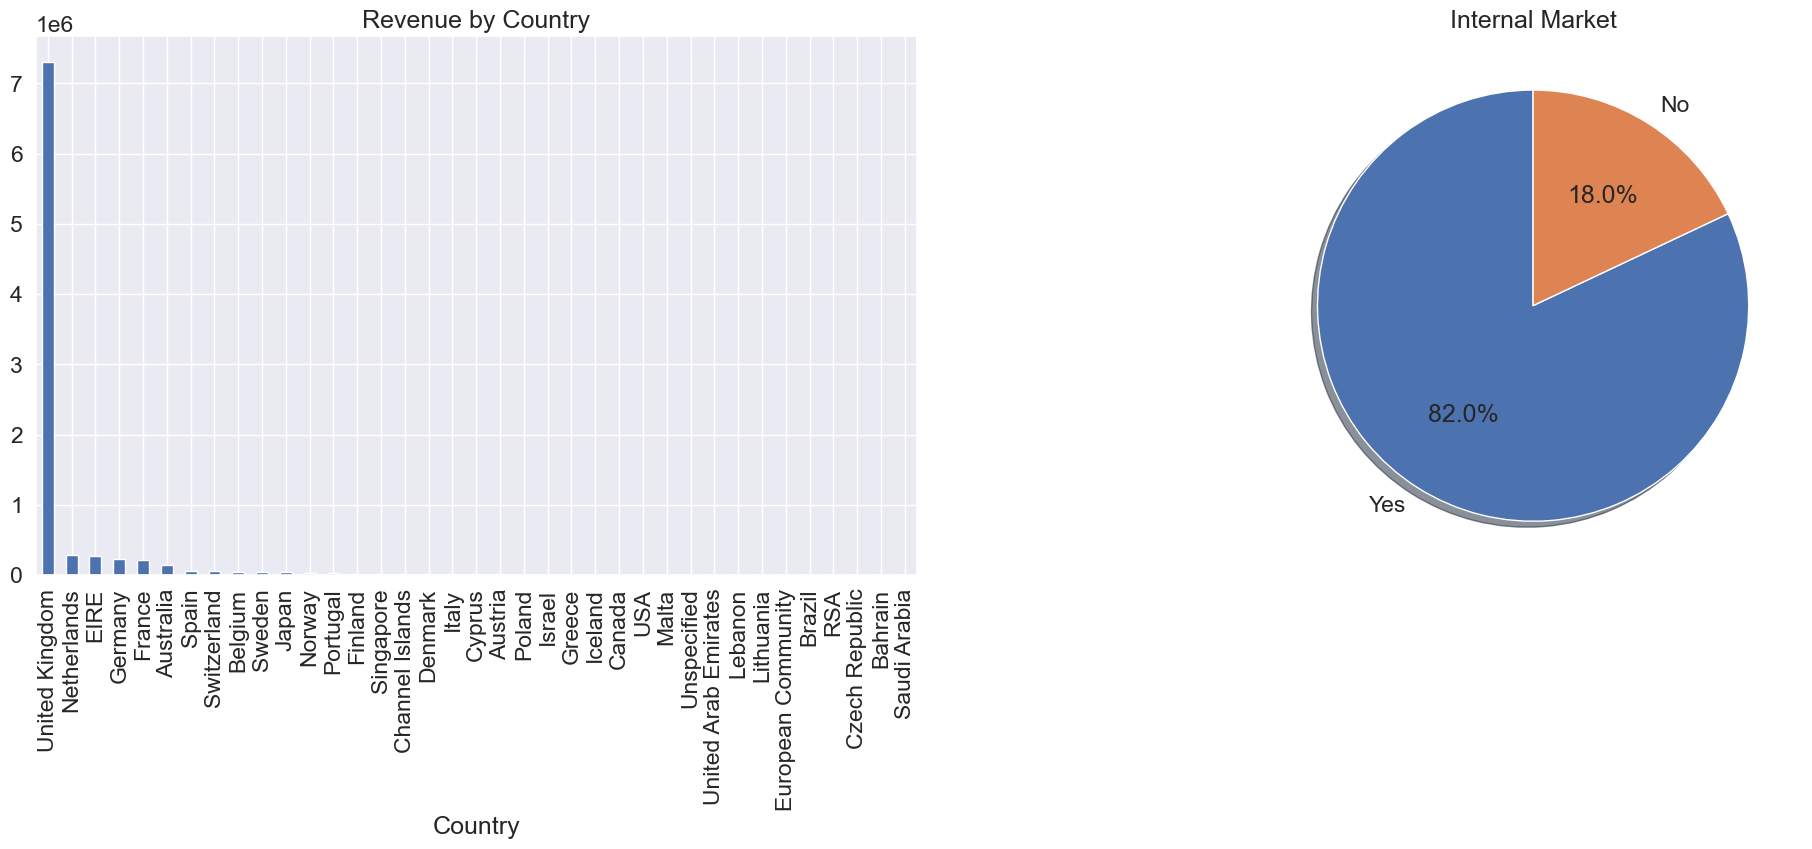

In [18]:
import matplotlib.pyplot as plt 

fig = plt.figure(figsize= (25, 7))
f1 = fig.add_subplot(121)

g = df.groupby(['Country'])['Revenue'].sum().sort_values(ascending= False).\
    plot(kind= 'bar', title= 'Revenue by Country')

df['Internal'] = df['Country'].apply(lambda x: 'Yes' if x=='United Kingdom' else 'No' )
f2 = fig.add_subplot(122)
market = df.groupby(["Internal"])['Revenue'].sum().sort_values(ascending = False)
g = plt.pie(market, labels=market.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Internal Market')
plt.show()

Plot: Top Customers

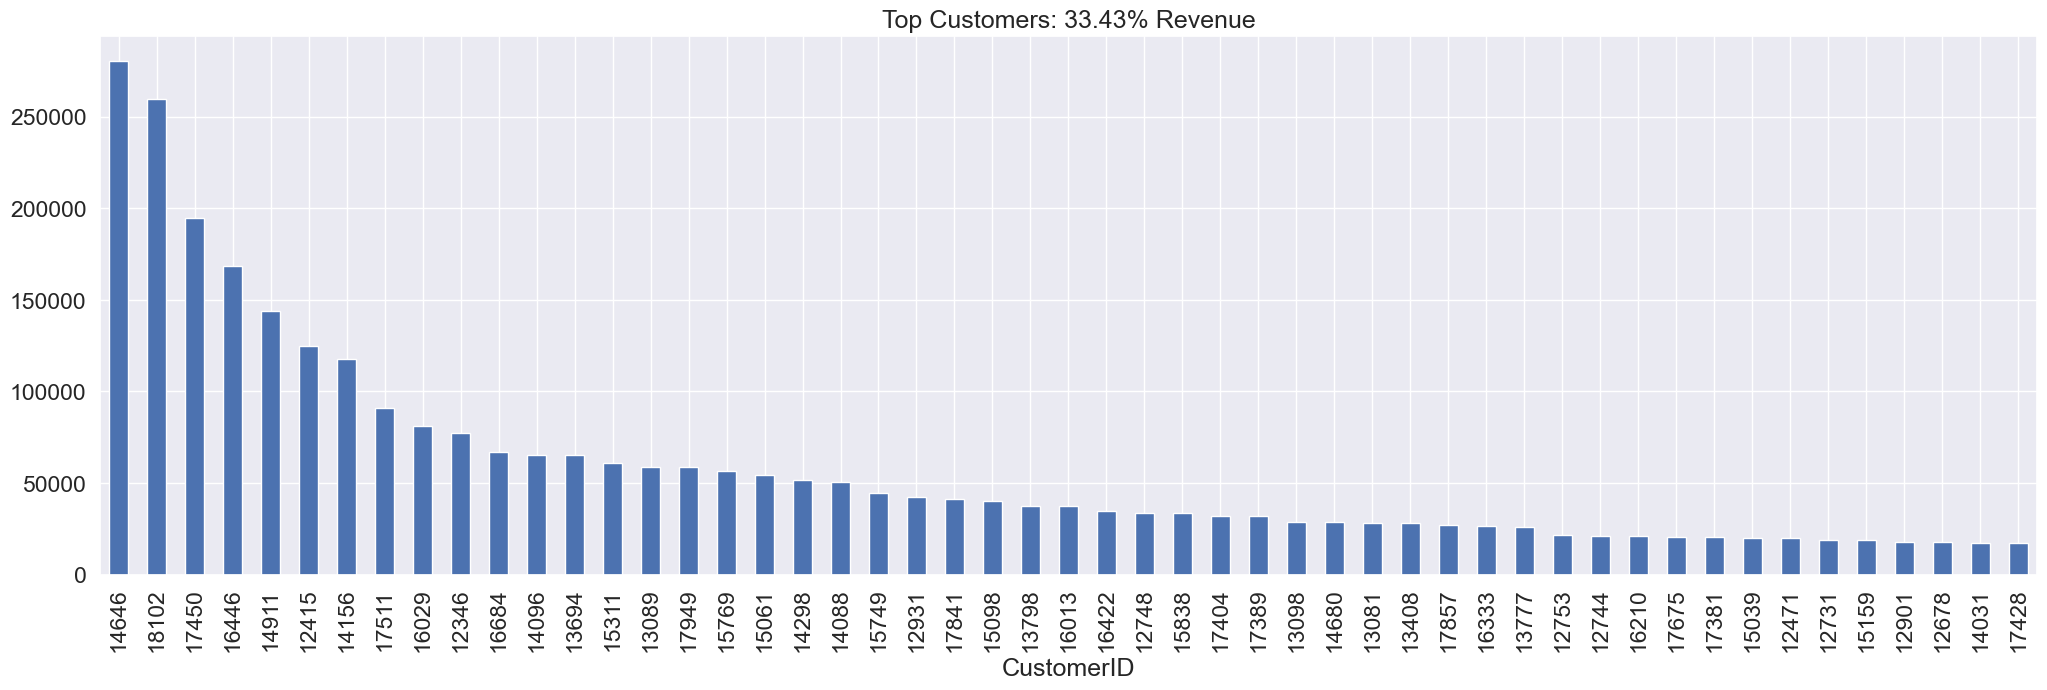

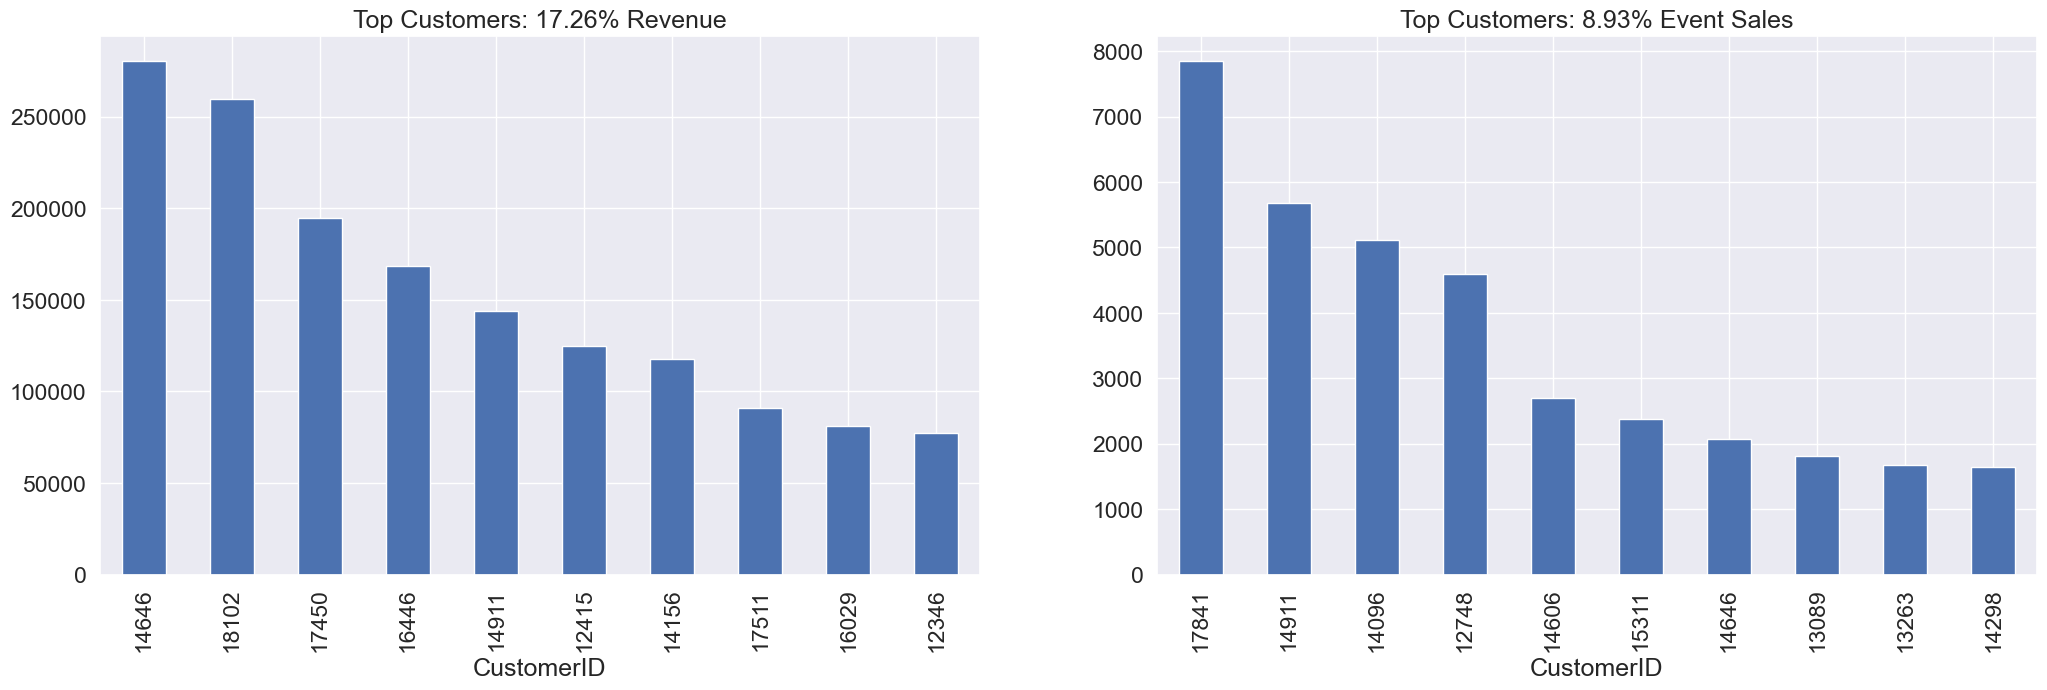

In [19]:
fig = plt.figure(figsize= (25, 7))
percentSales = np.round((df.groupby("CustomerID")['Revenue'].sum().\
                         sort_values(ascending= False)[:51].sum() / df.groupby(['CustomerID'])['Revenue'].sum().\
                            sort_values(ascending= False).sum()) * 100, 2)

g = df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending= False)[:51].\
    plot(kind= 'bar', title= 'Top Customers: {:3.2f}% Revenue'.format(percentSales))


fig = plt.figure(figsize= (25, 7))
f1 = fig.add_subplot(121)
percentSales = np.round((df.groupby("CustomerID")['Revenue'].sum().\
                         sort_values(ascending= False)[:10].sum() / df.groupby(['CustomerID'])['Revenue'].sum().\
                            sort_values(ascending= False).sum()) * 100, 2)
g = df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending= False)[:10].\
    plot(kind= 'bar', title= 'Top Customers: {:3.2f}% Revenue'.format(percentSales))

f1 = fig.add_subplot(122)
percentSales = np.round((df.groupby("CustomerID")['Revenue'].count().\
                         sort_values(ascending= False)[:10].sum() / df.groupby(['CustomerID'])['Revenue'].count().\
                            sort_values(ascending= False).sum()) * 100, 2)
g = df.groupby('CustomerID')['Revenue'].count().sort_values(ascending= False)[:10].\
    plot(kind= 'bar', title= 'Top Customers: {:3.2f}% Event Sales'.format(percentSales))


Plot: Products by Revenue, Amounts, and number of Purchase Events

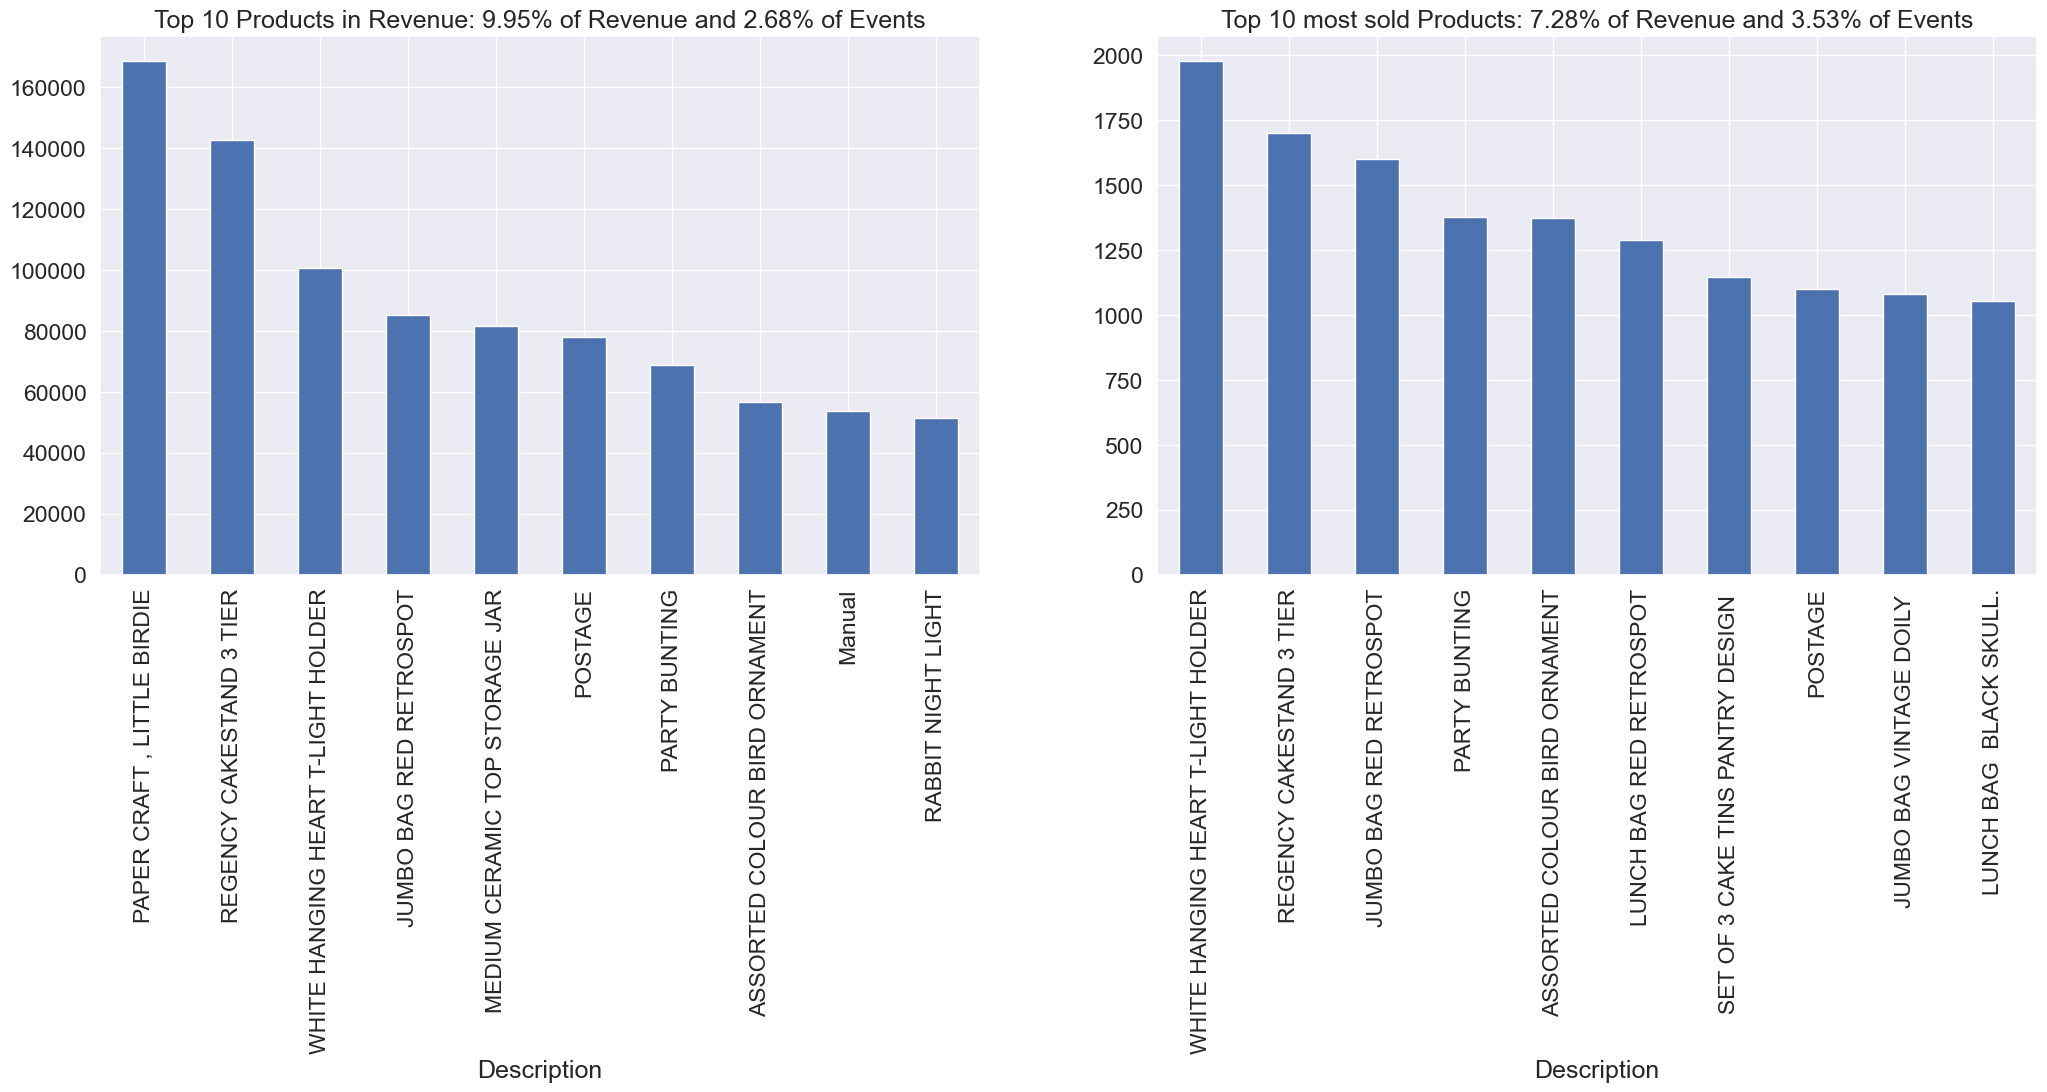

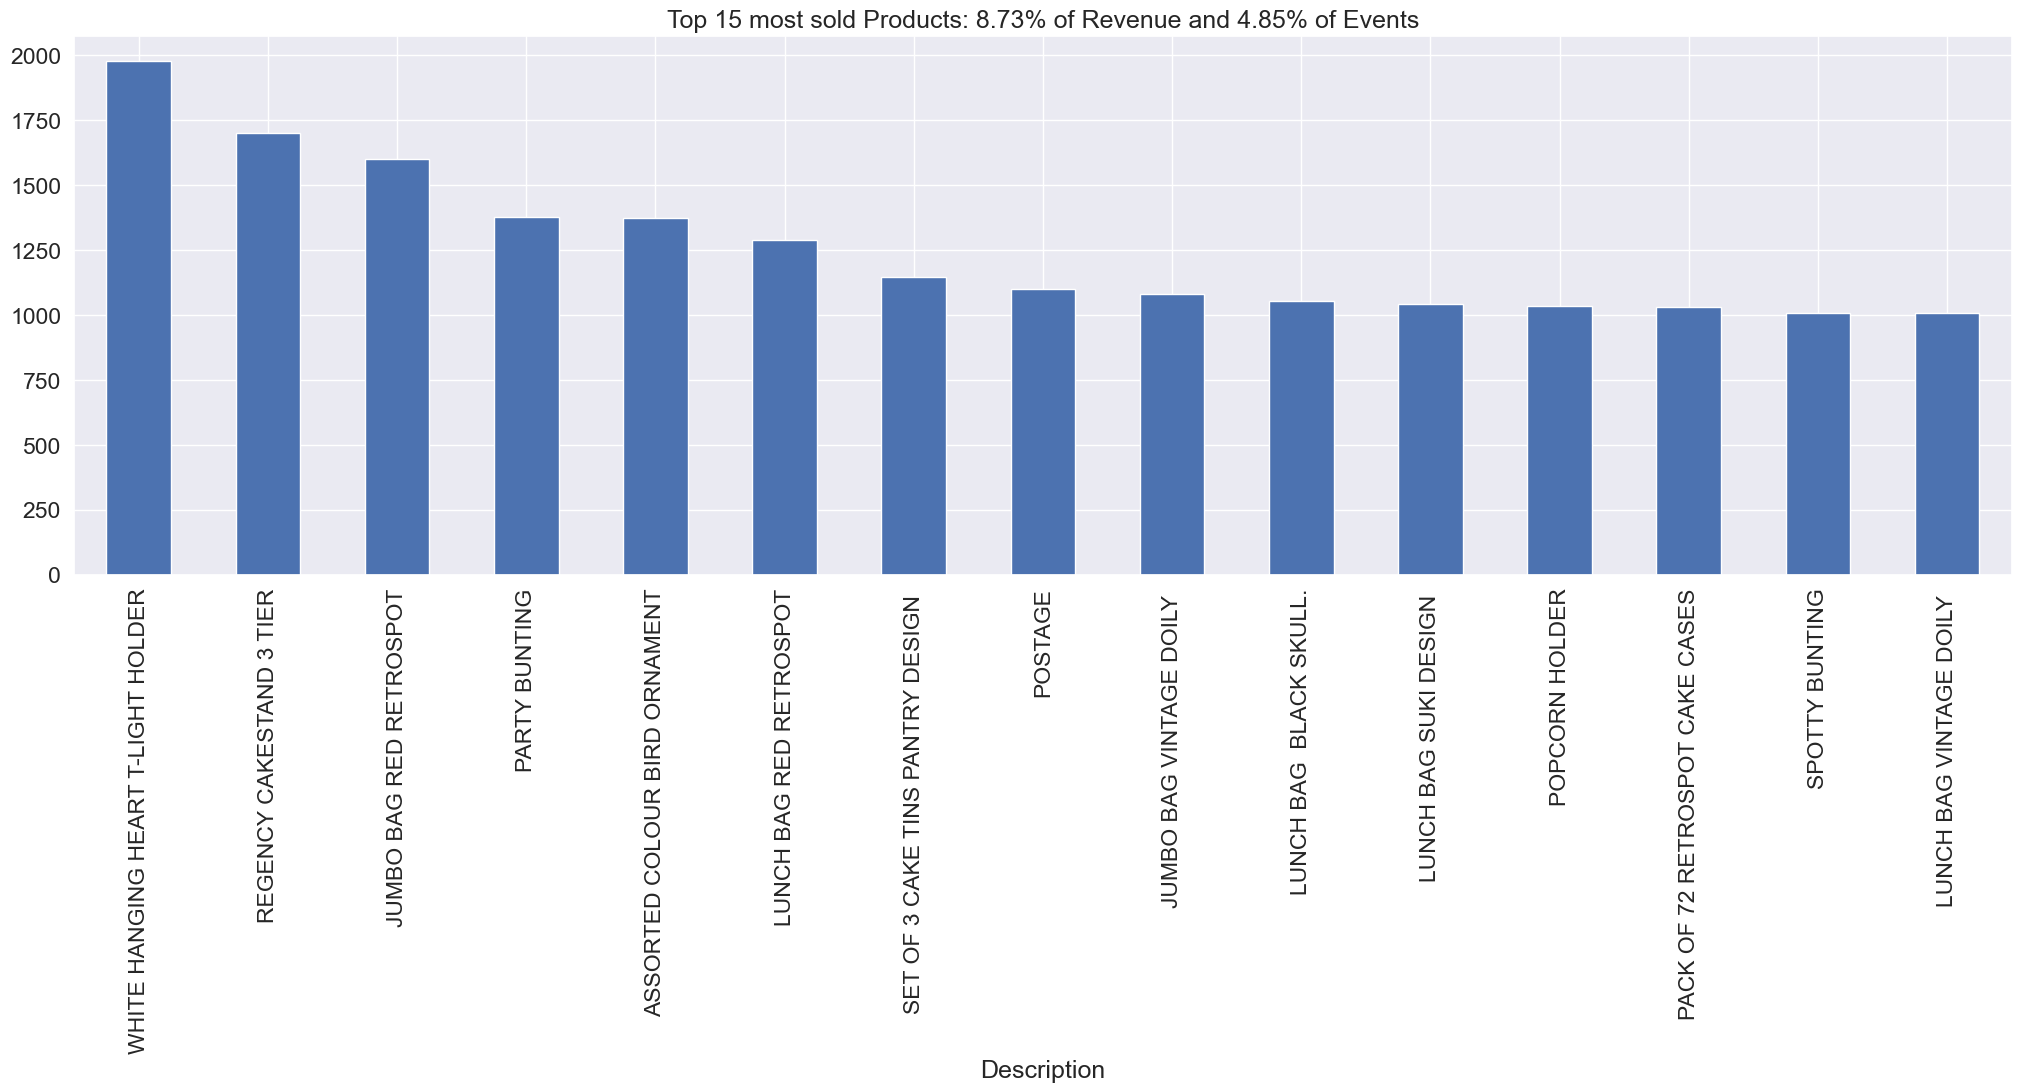

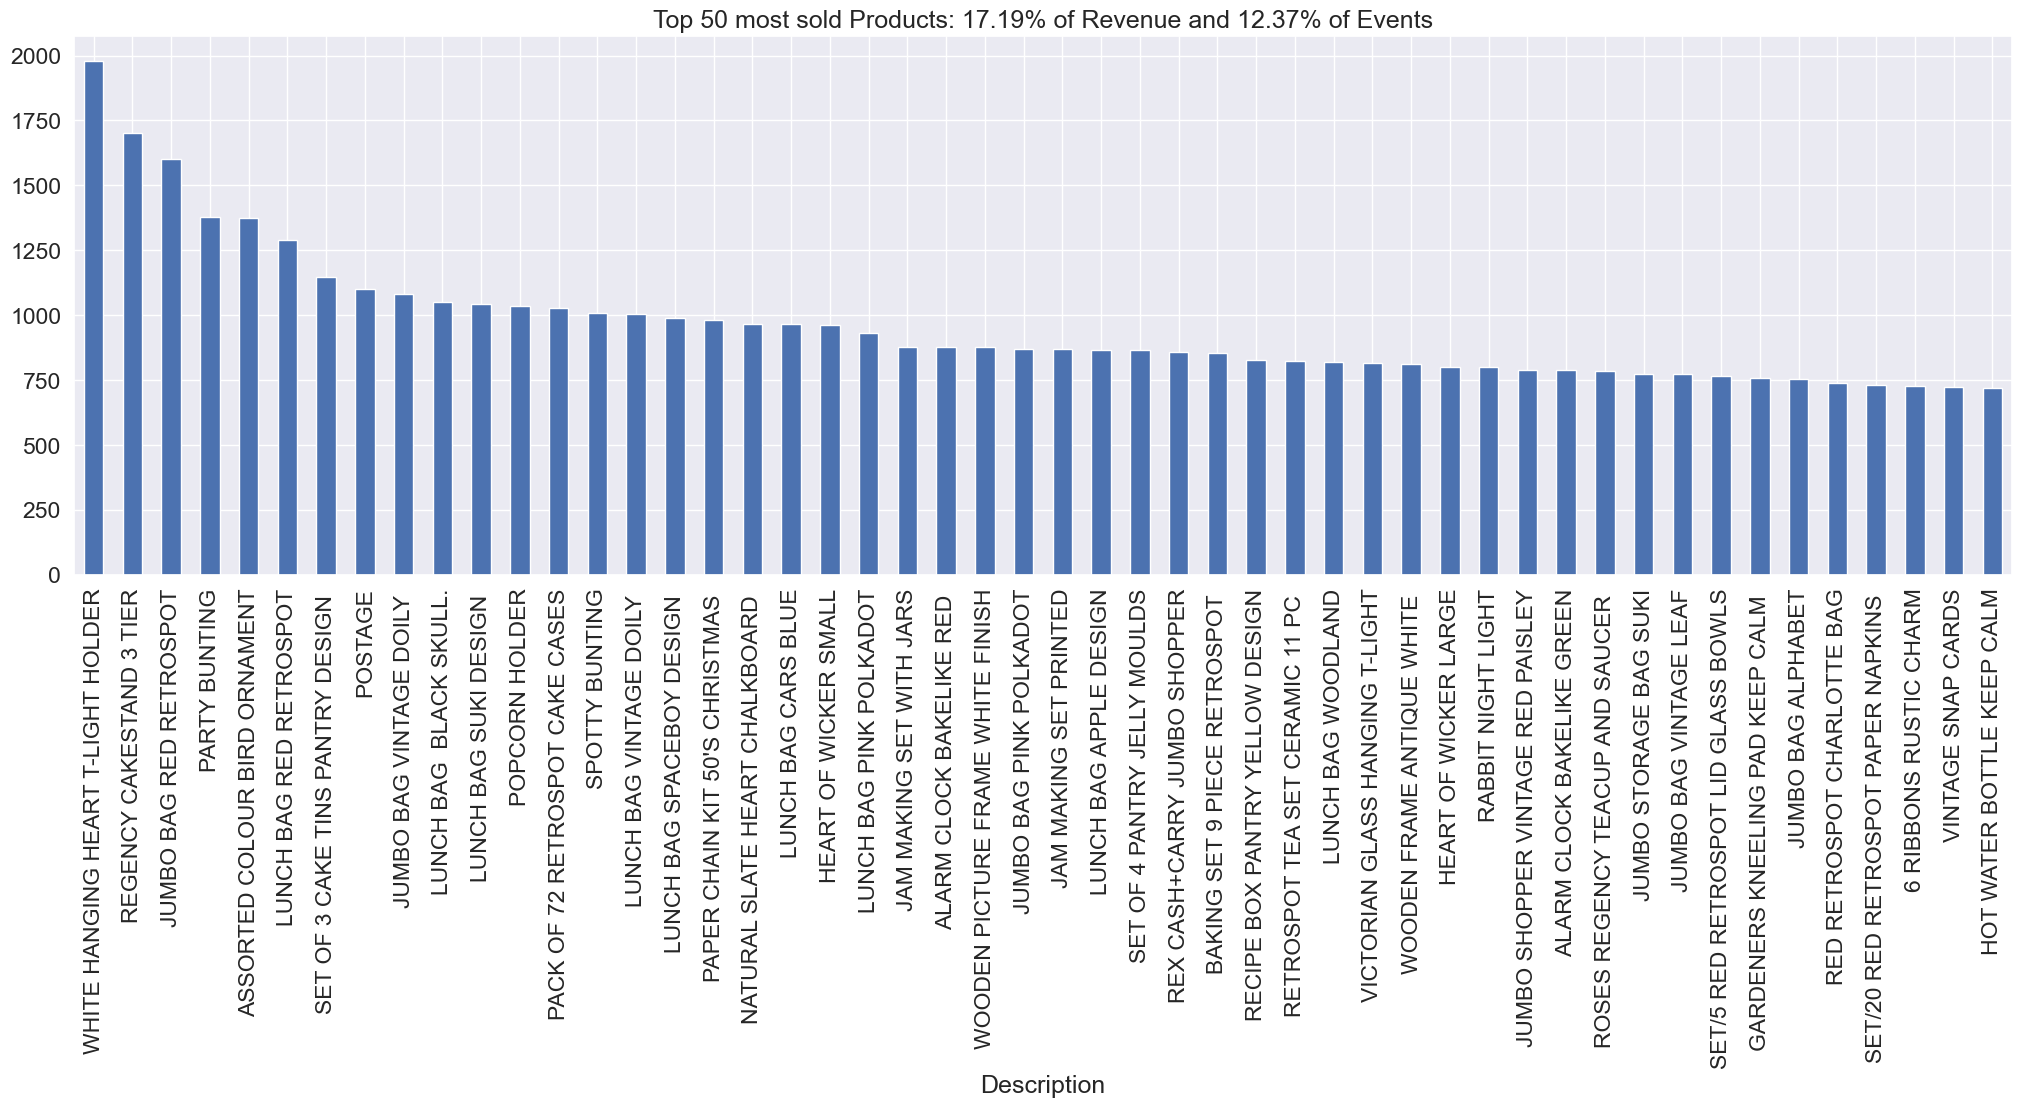

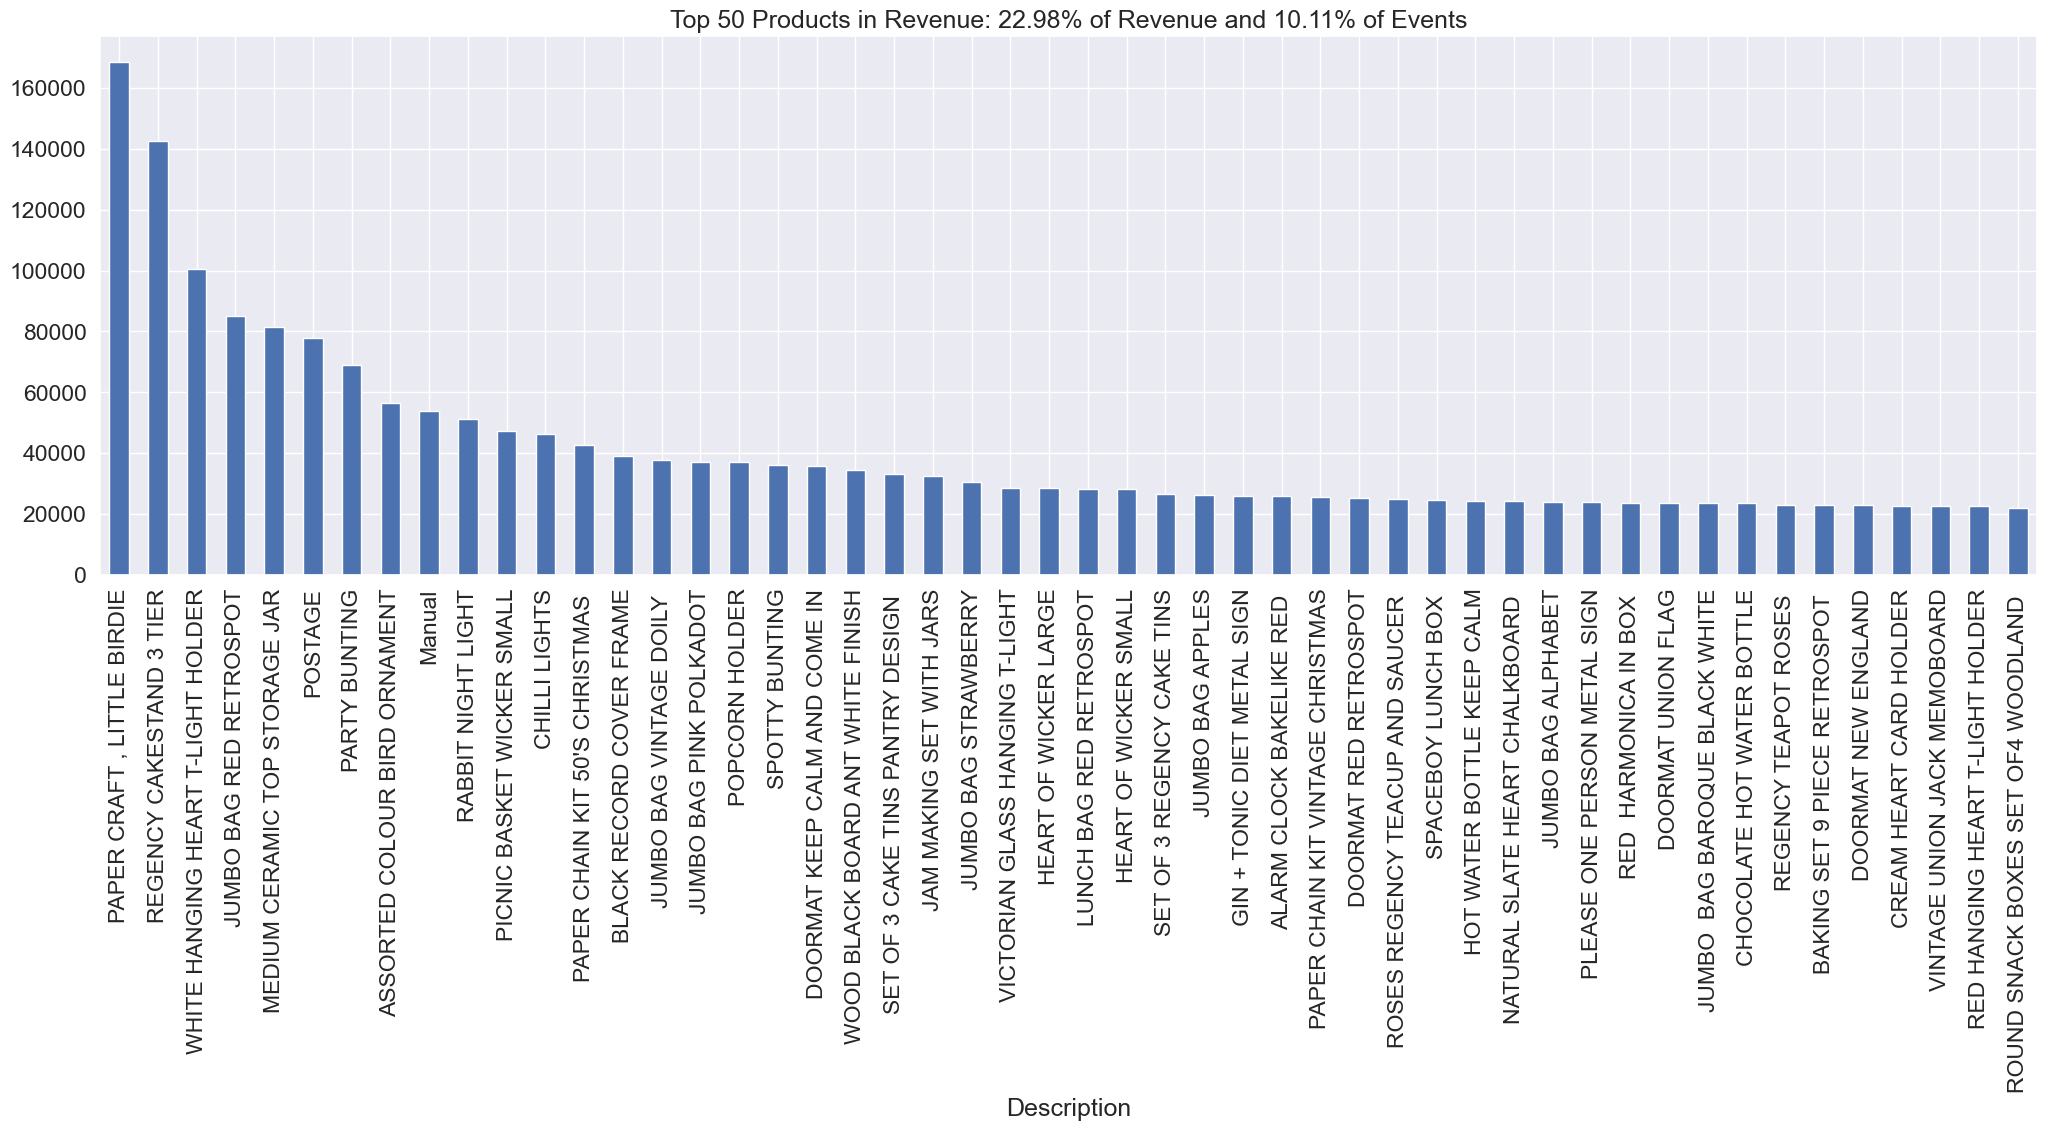

In [20]:
revenue_sum = df.groupby("Description")['Revenue'].sum().sort_values(ascending= False)
invoices_prod = df[['Description', 'InvoiceNo']].groupby('Description')['InvoiceNo'].unique().\
    agg(np.size).sort_values(ascending= False)

fig = plt.figure(figsize= (25, 7))
f1 = fig.add_subplot(121)
top10 = list(revenue_sum[:10].index)
percentSales = np.round((revenue_sum[top10].sum()/revenue_sum.sum()) * 100, 2)
percentEvents = np.round((invoices_prod[top10].sum()/invoices_prod.sum()) * 100, 2)
g = revenue_sum[top10].plot(kind= 'bar', title= 'Top 10 Products in Revenue: {:3.2f}% of Revenue and {:3.2f}% of Events'.\
                            format(percentSales, percentEvents))

f1 = fig.add_subplot(122)
top10_event = list(invoices_prod[:10].index)
percentSales = np.round((revenue_sum[top10_event].sum()/revenue_sum.sum()) * 100, 2)
percentEvents = np.round((invoices_prod[top10_event].sum()/invoices_prod.sum()) * 100, 2)
g = invoices_prod[top10_event].plot(kind= 'bar', title= 'Top 10 most sold Products: {:3.2f}% of Revenue and {:3.2f}% of Events'.\
                                    format(percentSales, percentEvents))


fig = plt.figure(figsize= (25, 7))
top15_event = list(invoices_prod[:15].index)
percentSales = np.round((revenue_sum[top15_event].sum()/revenue_sum.sum()) * 100, 2)
percentEvents = np.round((invoices_prod[top15_event].sum()/invoices_prod.sum()) * 100, 2)
g = invoices_prod[top15_event].plot(kind= 'bar', title= 'Top 15 most sold Products: {:3.2f}% of Revenue and {:3.2f}% of Events'.\
                                    format(percentSales, percentEvents))


fig = plt.figure(figsize= (25, 7))
top50_event = list(invoices_prod[:50].index)
percentSales = np.round((revenue_sum[top50_event].sum()/revenue_sum.sum()) * 100, 2)
percentEvents = np.round((invoices_prod[top50_event].sum()/invoices_prod.sum()) * 100, 2)
g = invoices_prod[top50_event].plot(kind= 'bar', title= 'Top 50 most sold Products: {:3.2f}% of Revenue and {:3.2f}% of Events'.\
                                    format(percentSales, percentEvents))


fig = plt.figure(figsize= (25, 7))
top50 = list(revenue_sum[:50].index)
percentSales = np.round((revenue_sum[top50].sum()/revenue_sum.sum()) * 100, 2)
percentEvents = np.round((invoices_prod[top50].sum()/invoices_prod.sum()) * 100, 2)
g = revenue_sum[top50].plot(kind= 'bar', title= 'Top 50 Products in Revenue: {:3.2f}% of Revenue and {:3.2f}% of Events'.\
                            format(percentSales, percentEvents))



#### RFM Analysis for Customer Segmentation
- Score customers based on Recency, Frequency and Monetary.
    This scoring can be done by clustering methods.
- Classify/cluster customers based on these attributes.

##### Preprocessing
Defining the metrics and standardizing measures.

In [21]:
ref_date = df['InvoiceDate'].max() + pd.Timedelta(days= 1)
print("Latest Date: ", df['InvoiceDate'].max())
print("Reference Date: ", ref_date)

df['Days since purchase'] = (ref_date - df['InvoiceDate']).dt.days
customer_history_df = df[['CustomerID', 'Days since purchase']].groupby("CustomerID").min().reset_index()
customer_history_df.rename(columns= {'Days since purchase': 'Recency'}, inplace= True)
display(customer_history_df.head(5))

Latest Date:  2011-12-09 12:50:00
Reference Date:  2011-12-10 12:50:00


CustomerID  Recency
0       12346      326
1       12347        2
2       12348       75
3       12349       19
4       12350      310

In [22]:
customer_history_df.describe().transpose()

count          mean          std      min       25%      50%  \
CustomerID  4338.0  15300.408022  1721.808492  12346.0  13813.25  15299.5   
Recency     4338.0     92.536422   100.014169      1.0      18.0     51.0   

                 75%      max  
CustomerID  16778.75  18287.0  
Recency        142.0    374.0

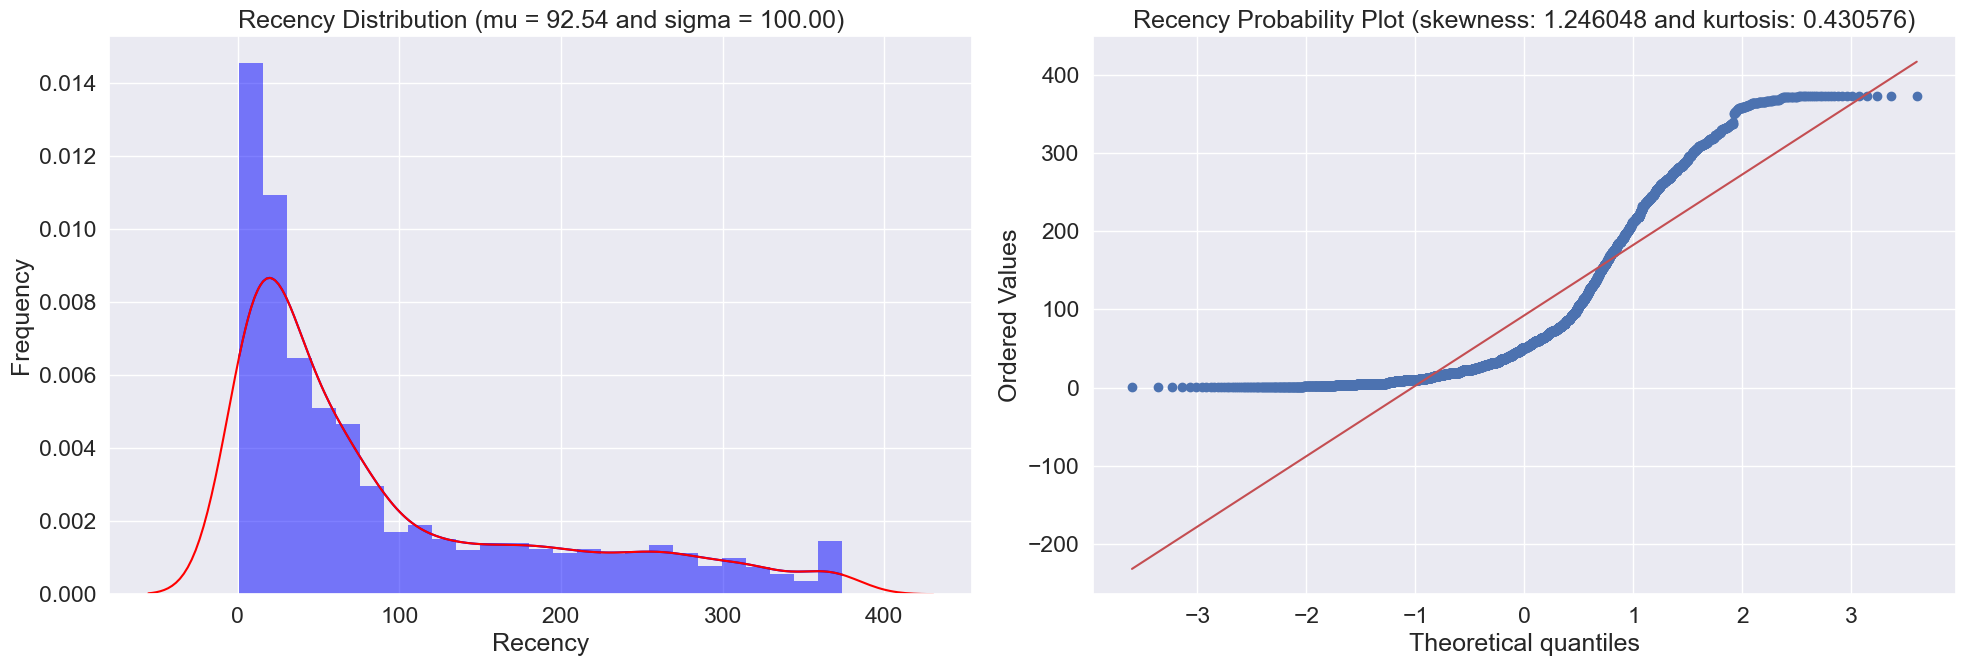

In [23]:
def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20, 7))

    (mu, sigma) = norm.fit(data)

    # Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.histplot(data, kde=True, stat="density", linewidth=0, color='blue')
    sns.kdeplot(data, color='red')
    fig1.set_title(measure + ' Distribution (mu = {:.2f} and sigma = {:.2f})'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')

    # QQ Plot
    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f})'.format(data.skew(), data.kurt()), loc='center')

    plt.tight_layout()
    plt.show()

# Example usage
QQ_plot(customer_history_df['Recency'], 'Recency')

- The recency distribution is skewed, peaks at the left and leaves a long tail to the right.
- The sales recency also doesn't align with the diagonal red line -> deviates from normal distribution.
- With the skewness > 1 -> sales recency is skewed right = right tail is long relative to the left tail.
- Positive kurtosis = heavy-tailed distribution and some outliers.

In [24]:
customer_freq = (df[['CustomerID', 'InvoiceNo']].groupby(['CustomerID', 'InvoiceNo']).count().reset_index()).groupby(["CustomerID"]).count().reset_index()
customer_freq.rename(columns= {'InvoiceNo': 'Frequency'}, inplace= True)
customer_history_df = customer_history_df.merge(customer_freq)
customer_history_df.head(5)

CustomerID  Recency  Frequency
0       12346      326          1
1       12347        2          7
2       12348       75          4
3       12349       19          1
4       12350      310          1

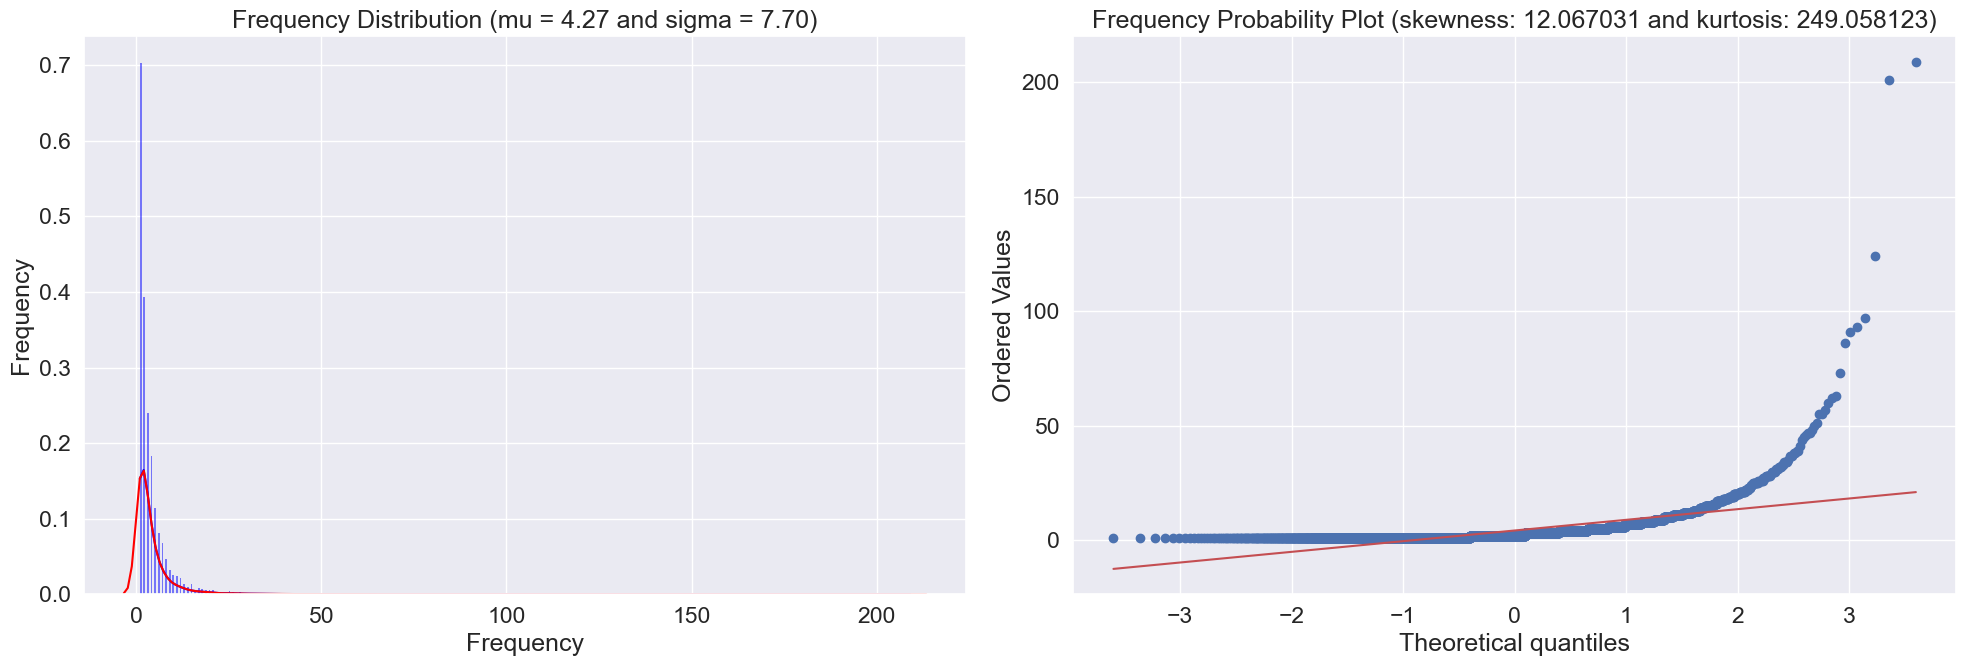

In [25]:
QQ_plot(customer_history_df['Frequency'], 'Frequency')

- Peaks early in the left -> Deviates heavily from normal distribution
- Skewness = 12.1 -> High lack of simmetry
- Kurtosis = 249 -> Heavy tailed, has outliers

In [26]:
customer_monetary = df[['CustomerID', 'Revenue']].groupby('CustomerID').sum().reset_index()
customer_history_df = customer_history_df.merge(customer_monetary)
customer_history_df.rename(columns= {'Revenue': 'Monetary'}, inplace= True)
customer_history_df.head(5)

CustomerID  Recency  Frequency  Monetary
0       12346      326          1  77183.60
1       12347        2          7   4310.00
2       12348       75          4   1797.24
3       12349       19          1   1757.55
4       12350      310          1    334.40

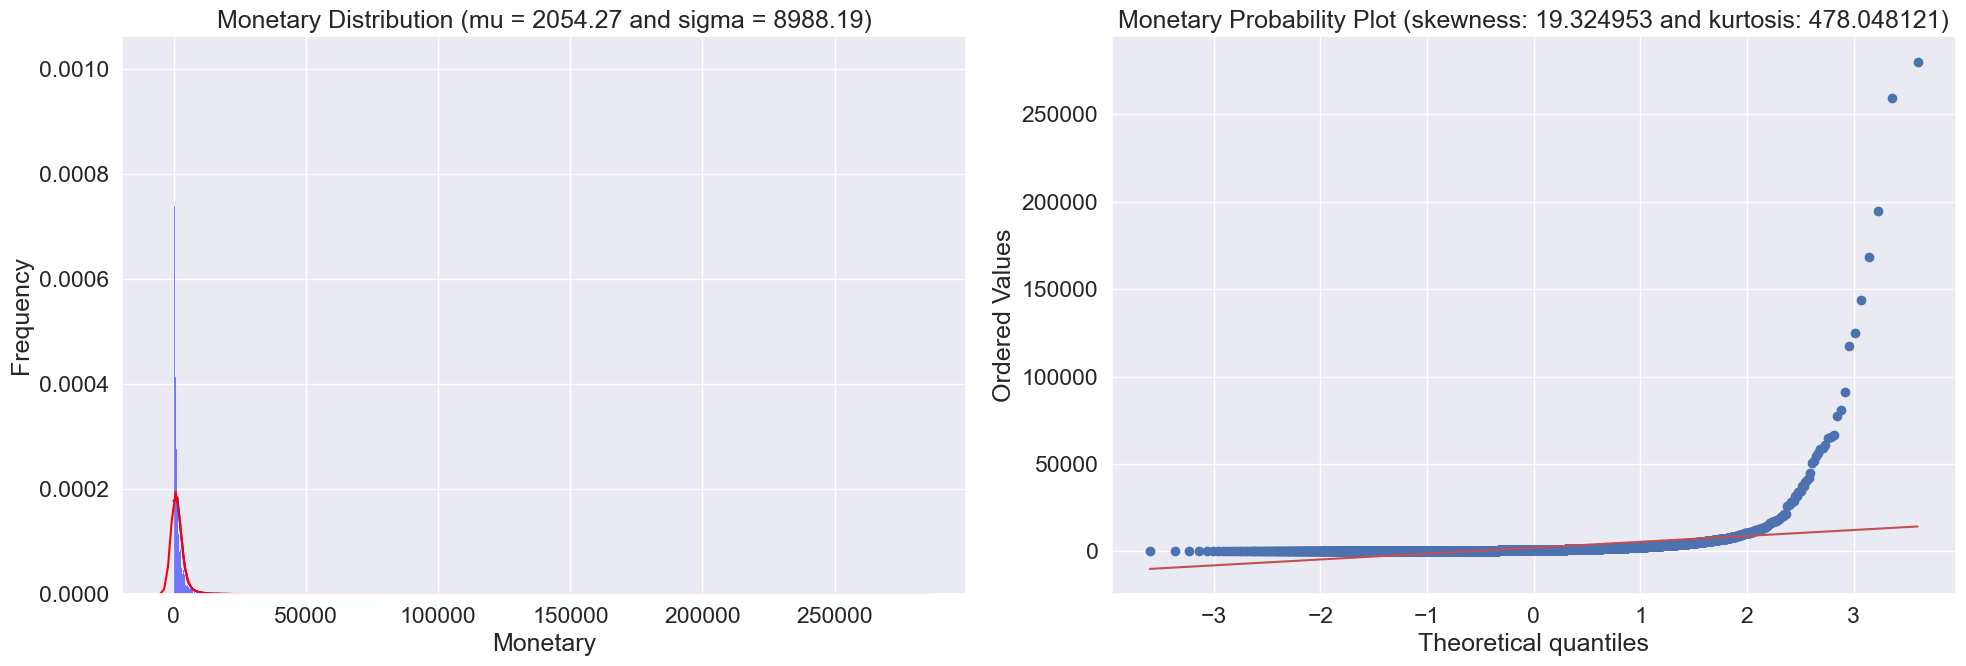

In [27]:
QQ_plot(customer_history_df['Monetary'], 'Monetary')

The same case as frequency, but the skewness and kurtosis is kicked up to 11.

In [28]:
customer_history_df.describe()

CustomerID      Recency    Frequency       Monetary
count        4338.0  4338.000000  4338.000000    4338.000000
mean   15300.408022    92.536422     4.272015    2054.266460
std     1721.808492   100.014169     7.697998    8989.230441
min         12346.0     1.000000     1.000000       3.750000
25%        13813.25    18.000000     1.000000     307.415000
50%         15299.5    51.000000     2.000000     674.485000
75%        16778.75   142.000000     5.000000    1661.740000
max         18287.0   374.000000   209.000000  280206.020000

In [29]:
customer_history_df['recency_log'] = customer_history_df['Recency'].apply(math.log)
customer_history_df['frequency_log'] = customer_history_df['Frequency'].apply(math.log)
customer_history_df['monetary_log'] = customer_history_df['Monetary'].apply(math.log)

feature_vector = ['recency_log', 'frequency_log', 'monetary_log']
X_subset = customer_history_df[feature_vector]
scaler = preprocessing.StandardScaler().fit(X_subset)
X_scaled = scaler.transform(X_subset)
pd.DataFrame(X_scaled, columns= X_subset.columns).describe().T

count          mean       std       min       25%       50%  \
recency_log    4338.0 -1.048288e-16  1.000115 -2.630445 -0.612424  0.114707   
frequency_log  4338.0 -9.991495e-17  1.000115 -1.048610 -1.048610 -0.279044   
monetary_log   4338.0 -7.010426e-16  1.000115 -4.179280 -0.684183 -0.060942   

                    75%       max  
recency_log    0.829652  1.505796  
frequency_log  0.738267  4.882714  
monetary_log   0.654244  4.721395

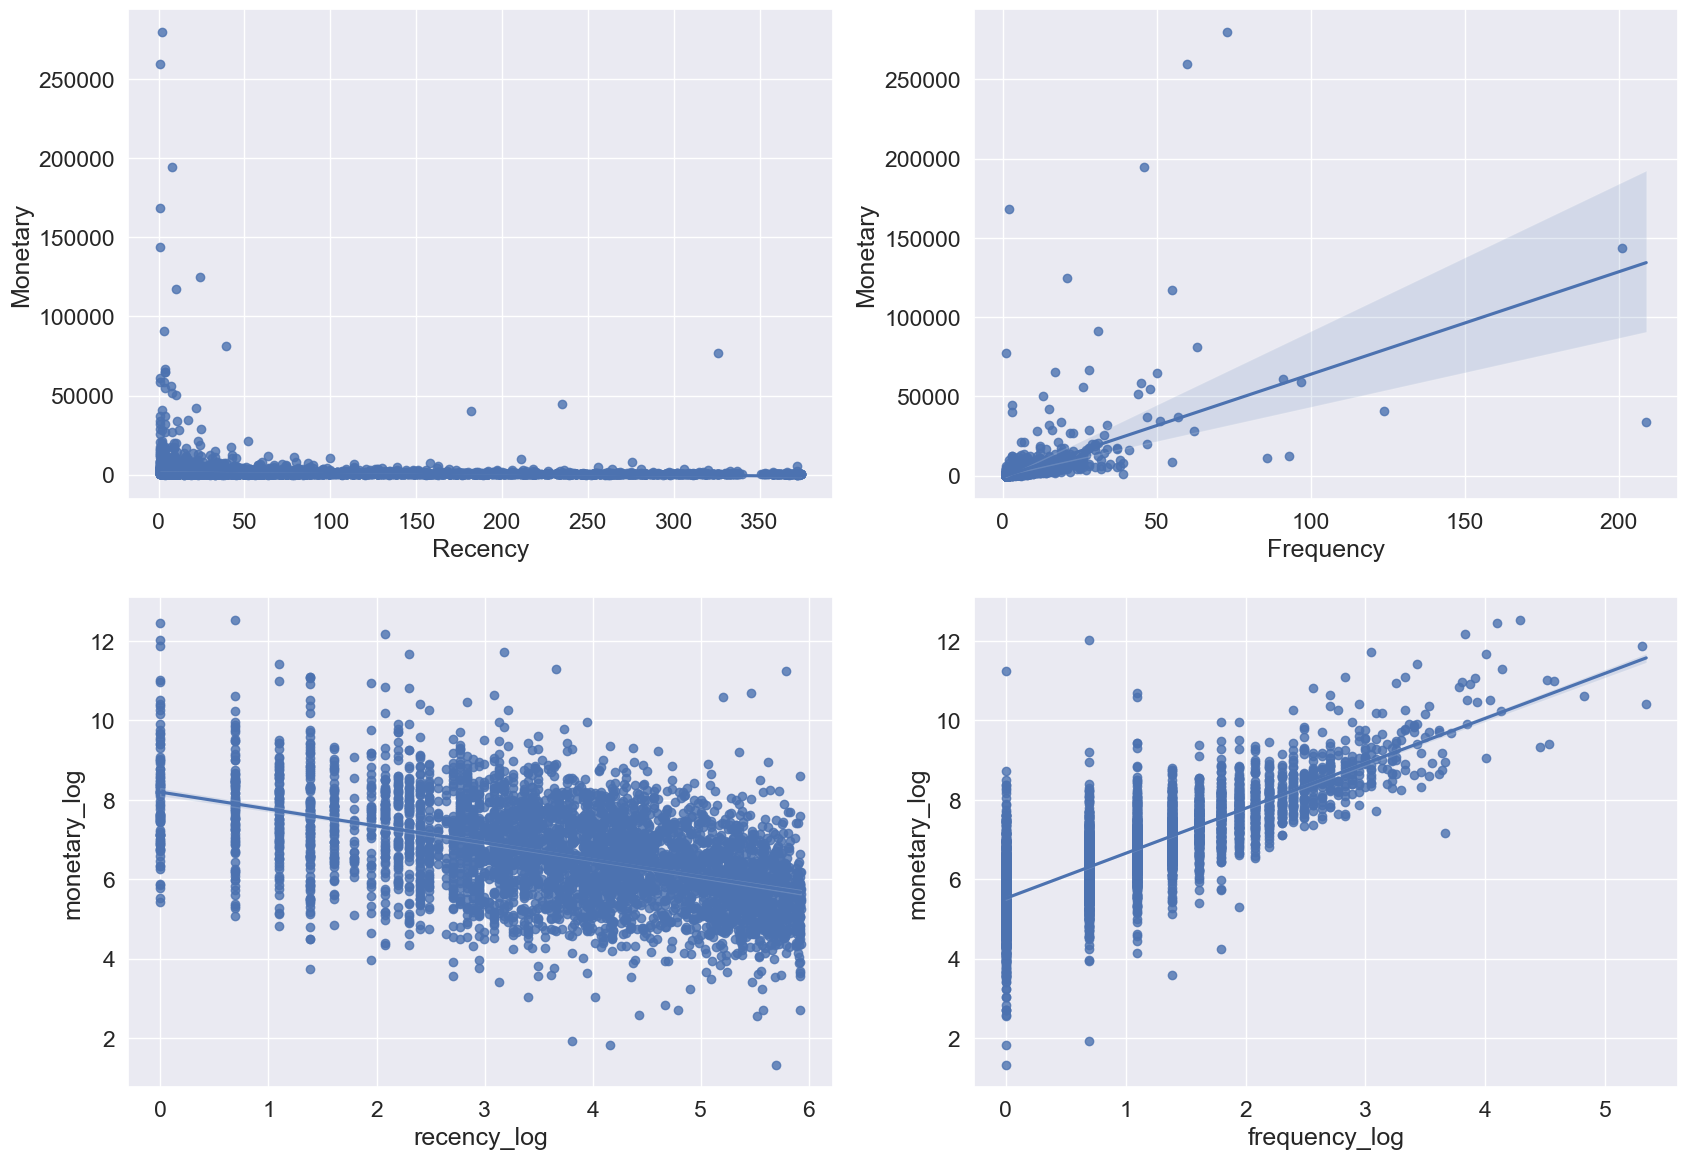

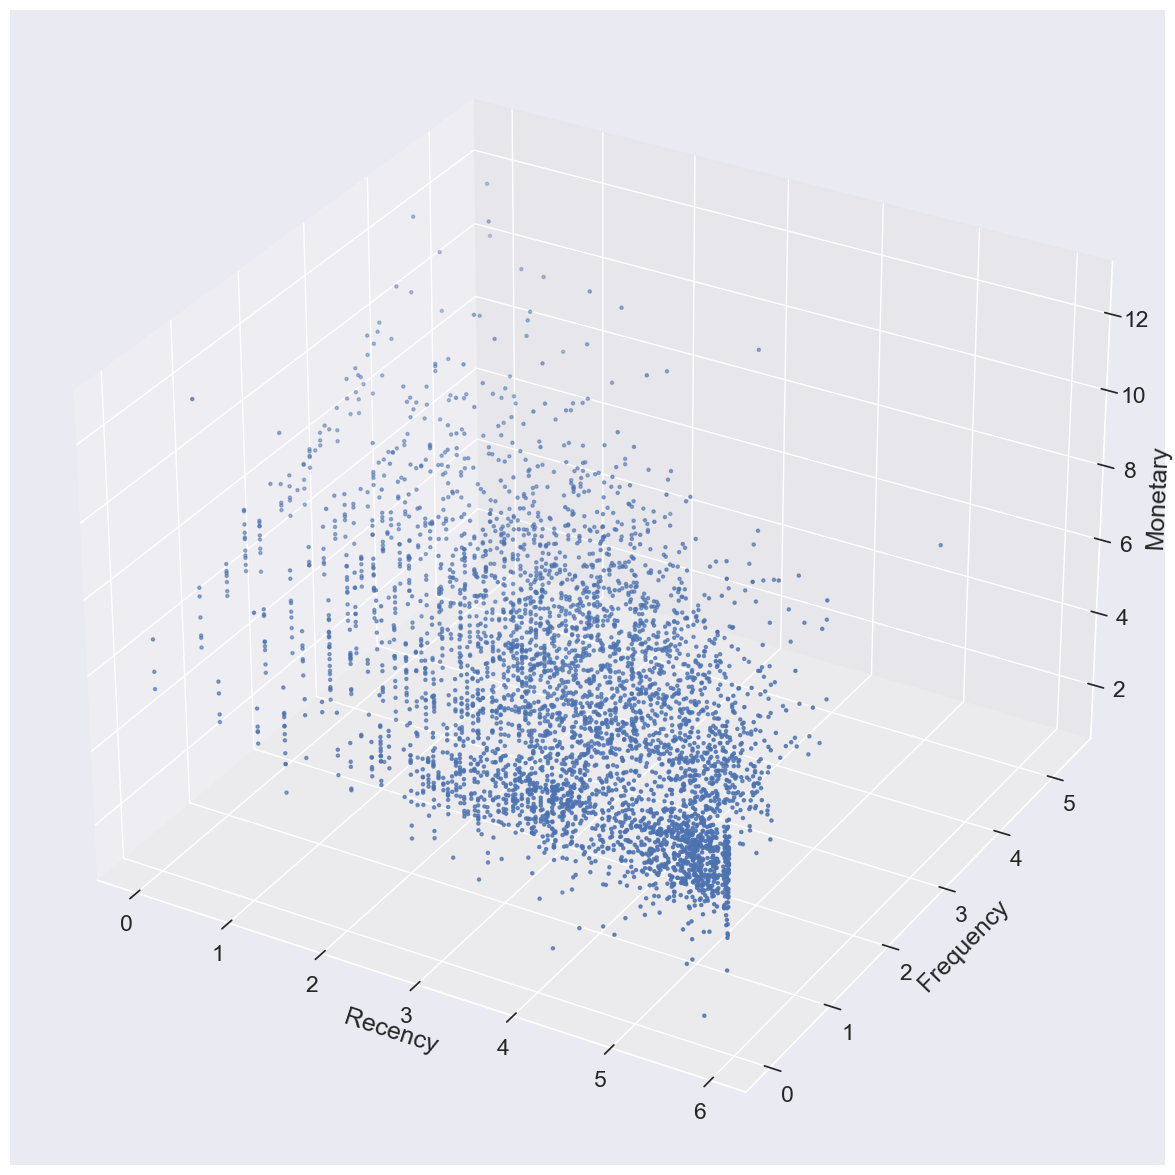

In [30]:
fig = plt.figure(figsize= (20, 14))
f1 = fig.add_subplot(221)
sns.regplot(x= 'Recency', y= 'Monetary', data= customer_history_df)
f1 = fig.add_subplot(222)
sns.regplot(x= 'Frequency', y= 'Monetary', data= customer_history_df)
f1 = fig.add_subplot(223)
sns.regplot(x= 'recency_log', y= 'monetary_log', data= customer_history_df)
f1 = fig.add_subplot(224)
sns.regplot(x= 'frequency_log', y= 'monetary_log', data= customer_history_df)

fig = plt.figure(figsize= (22, 15))
ax = fig.add_subplot(111, projection= '3d')

xs = customer_history_df['recency_log']
ys = customer_history_df['frequency_log']
zs = customer_history_df['monetary_log']
ax.scatter(xs, ys, zs, s= 5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()

##### Clustering - using Kmeans
- Use the elbow method to determine the number of customer clusters.
- Perform silhouette analysis to evaluate the clustering.
- Find insights.

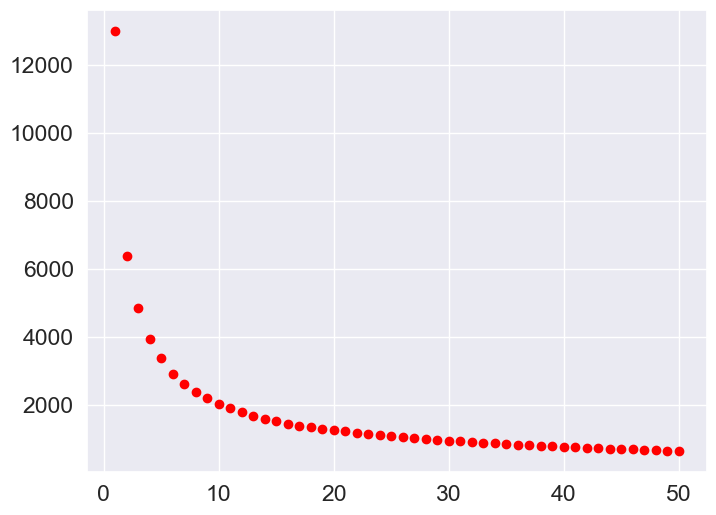

The best K suggested:  7


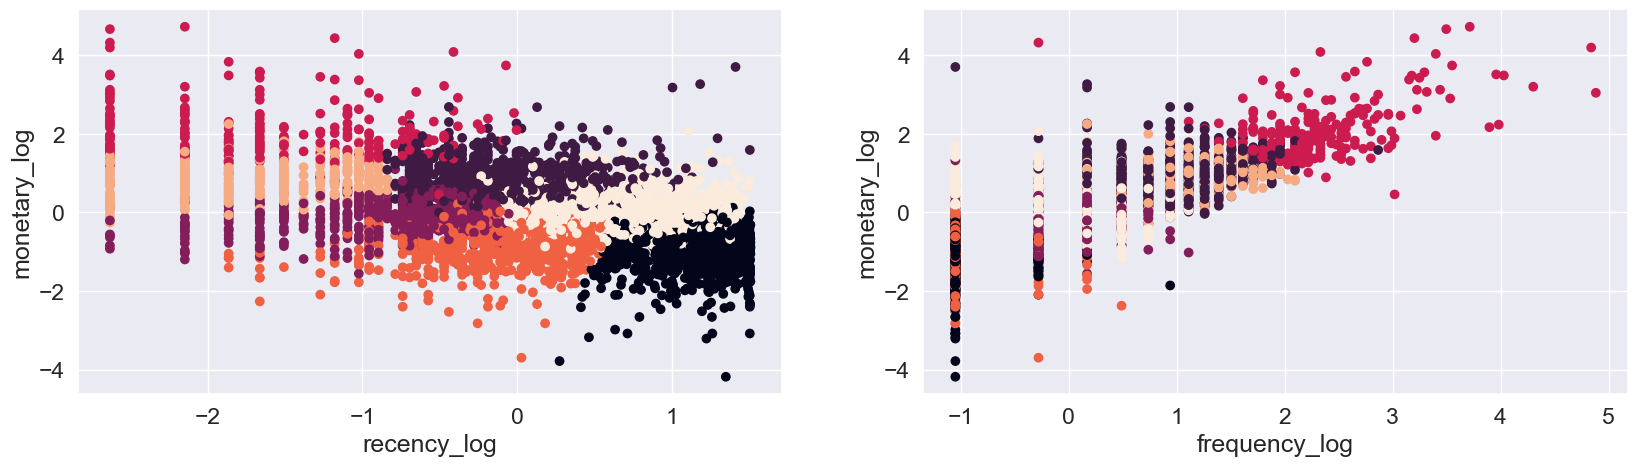

In [31]:
cl = 50
corte = 0.1

anterior = 100000000000000
cost = []
K_best = 50

for k in range(1, cl + 1):
    model = KMeans(
        n_clusters= k,
        init= 'k-means++',
        n_init= 10,
        max_iter= 300,
        tol = 1e-04,
        random_state= 101
    )

    model = model.fit(X_scaled)

    labels = model.labels_
    inertia = model.inertia_
    if (K_best == cl) and (((anterior - inertia)/anterior) < corte):
        K_best = k - 1 
    cost.append(inertia)
    anterior = inertia

plt.figure(figsize= (8, 6))
plt.scatter(range(1, cl + 1), cost, c= 'red')
plt.show()

print('The best K suggested: ', K_best)
model = KMeans(n_clusters= K_best, init= 'k-means++', n_init= 10, max_iter= 300, tol= 1e-04, random_state= 101)
model = model.fit(X_scaled)

labels = model.labels_ 
fig = plt.figure(figsize= (20, 5))

ax = fig.add_subplot(121)
plt.scatter(x = X_scaled[:, 0], y = X_scaled[:, 2], c= model.labels_.astype(float))
ax.set_xlabel(feature_vector[0])
ax.set_ylabel(feature_vector[2])

ax = fig.add_subplot(122)
plt.scatter(x = X_scaled[:, 1], y = X_scaled[:, 2], c = model.labels_.astype(float))
ax.set_xlabel(feature_vector[1])
ax.set_ylabel(feature_vector[2])

plt.show()

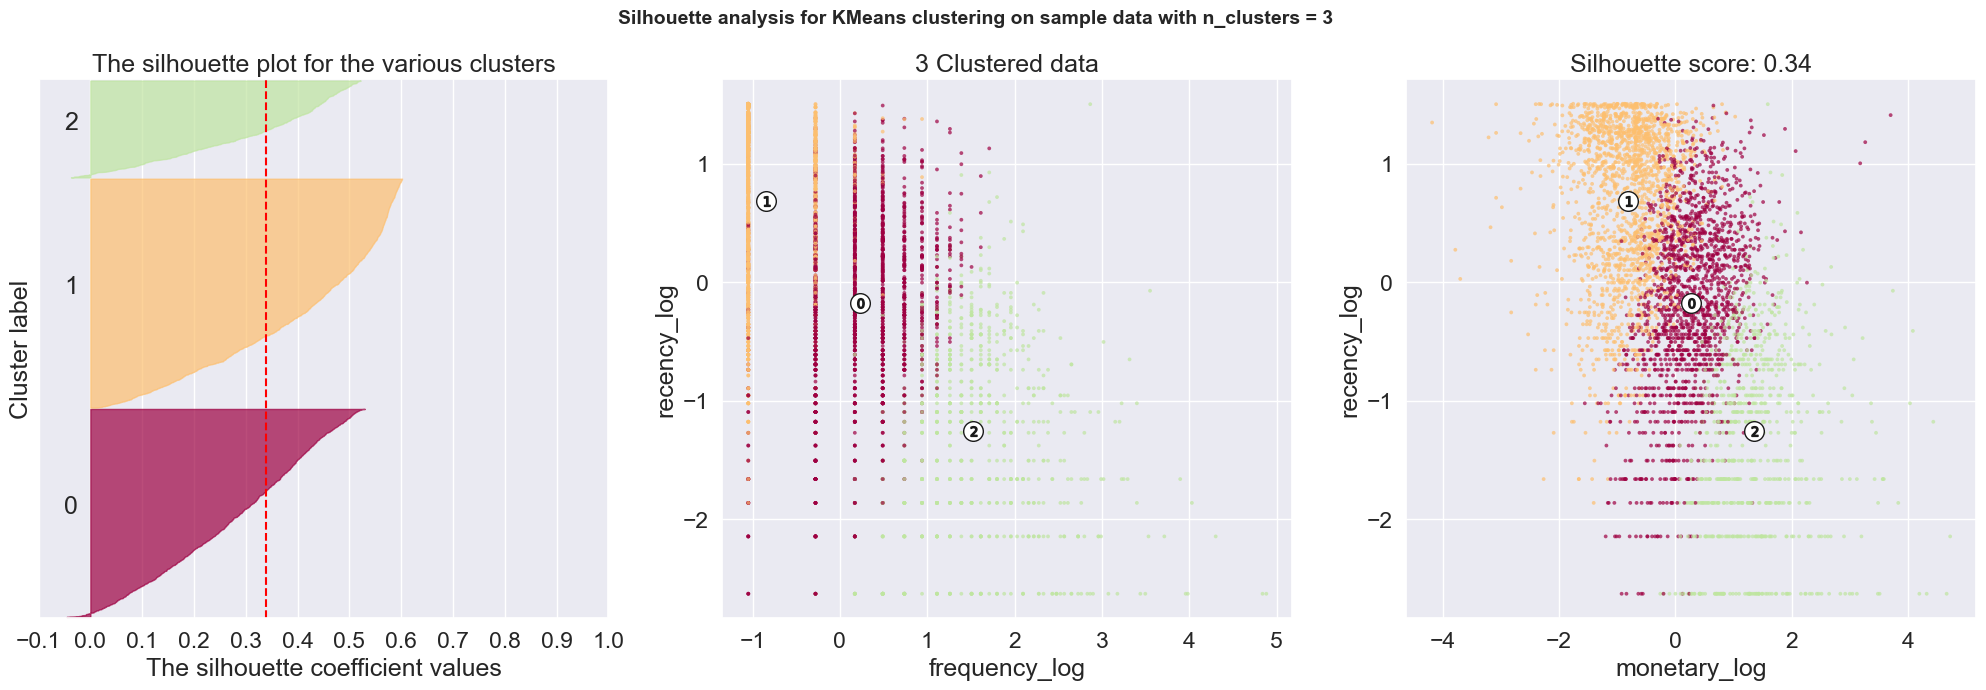

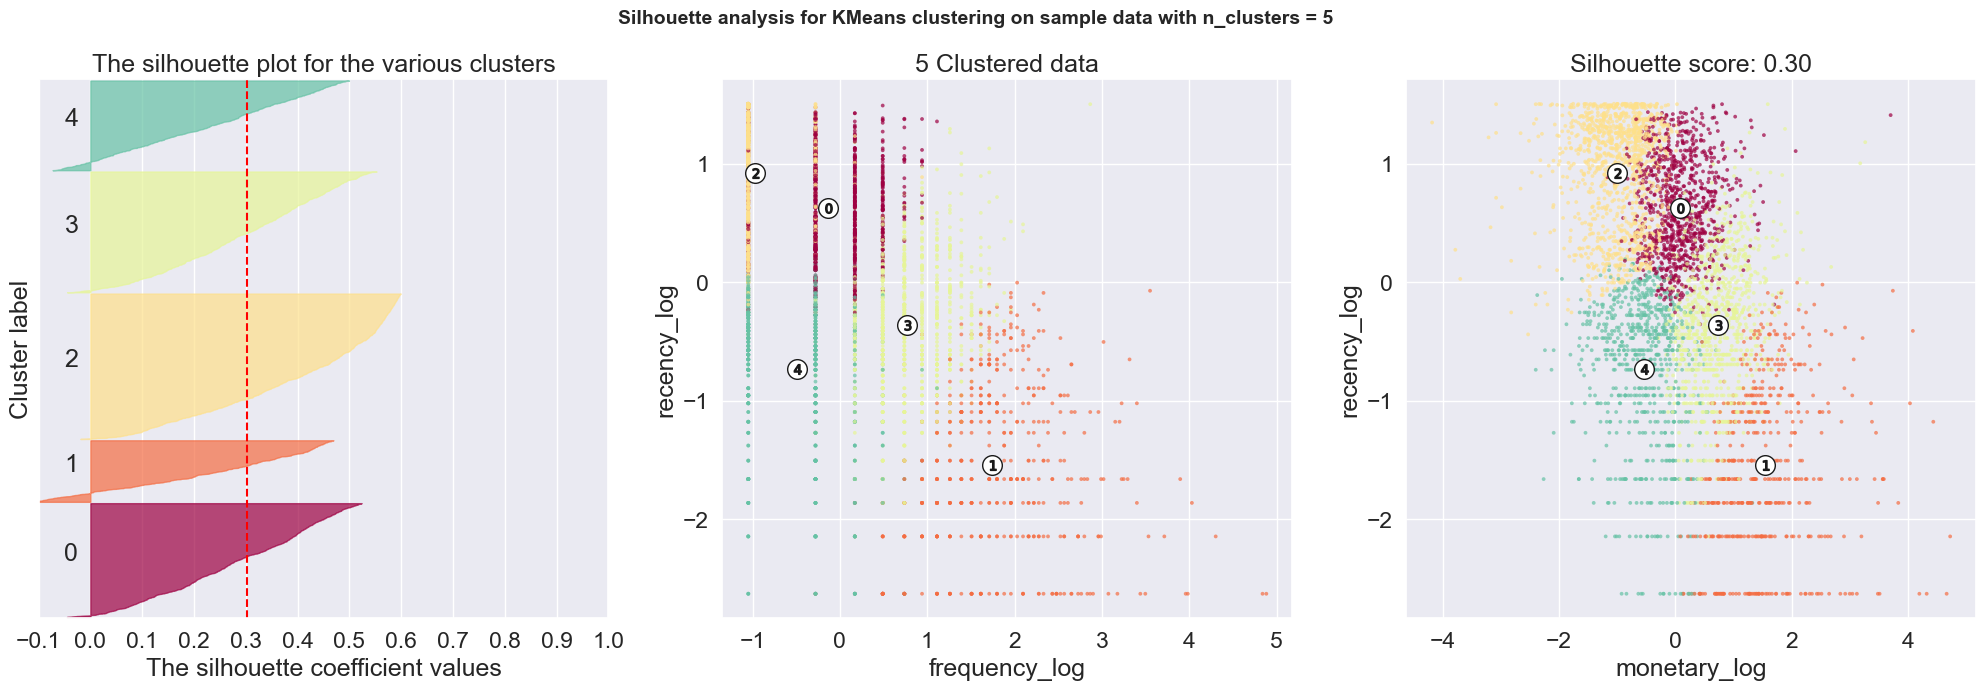

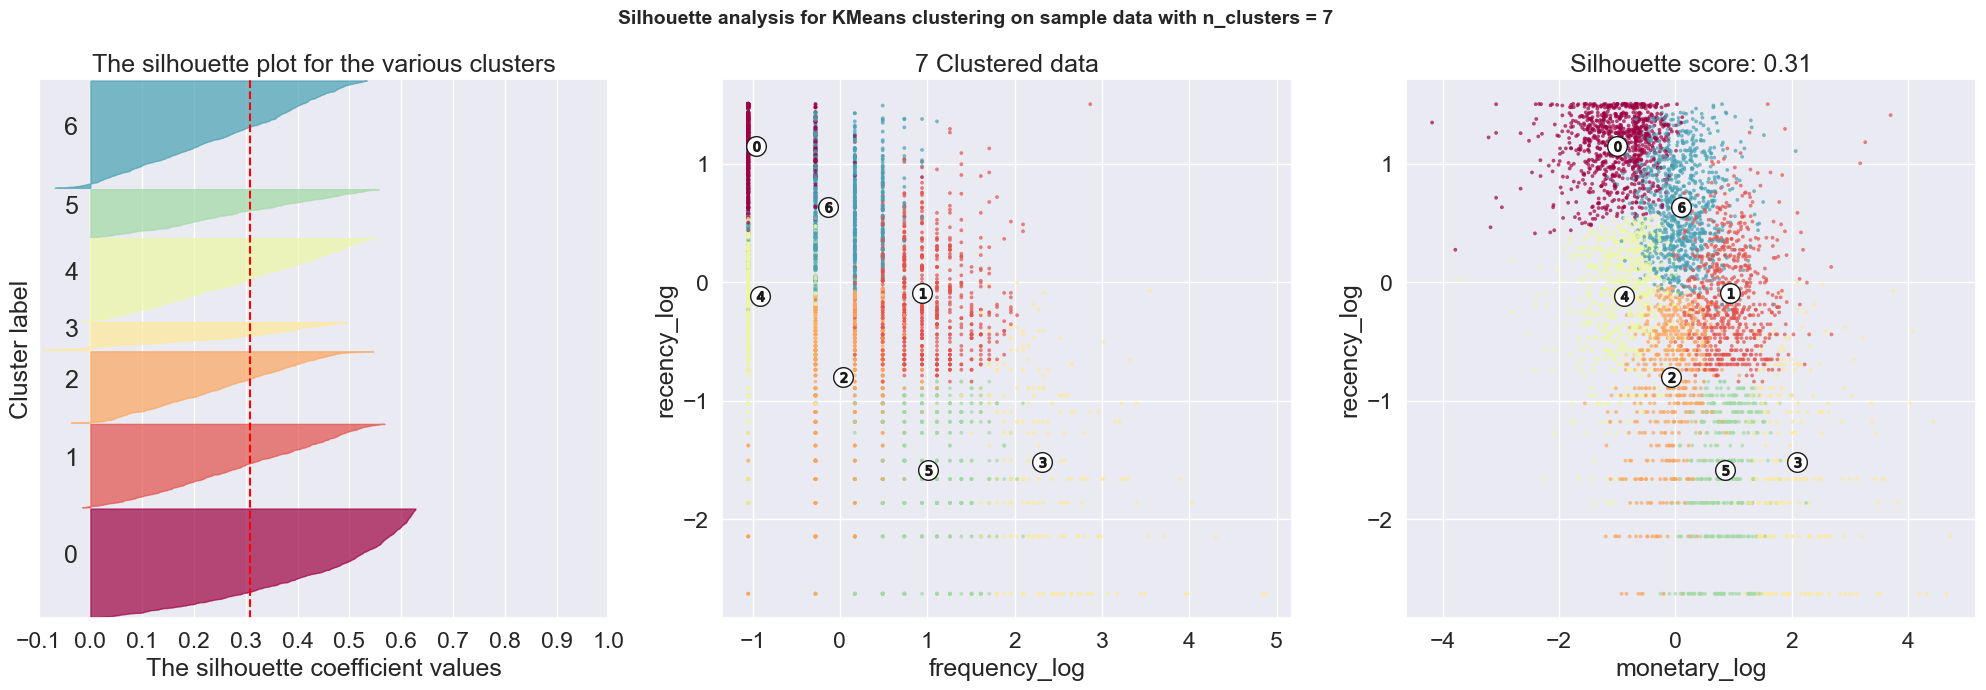

In [32]:
cluster_centers = dict()

for n_clusters in range(3,K_best+1,2):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_size_inches(25, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)
    cluster_labels = clusterer.fit_predict(X_scaled)

    silhouette_avg = silhouette_score(X = X_scaled, labels = cluster_labels)
    cluster_centers.update({n_clusters :{'cluster_center':clusterer.cluster_centers_,
                                         'silhouette_score':silhouette_avg,
                                         'labels':cluster_labels}
                           })

    sample_silhouette_values = silhouette_samples(X = X_scaled, labels = cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    
    centers = clusterer.cluster_centers_
    y = 0
    x = 1
    ax2.scatter(X_scaled[:, x], X_scaled[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')   
    ax2.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax2.set_title("{} Clustered data".format(n_clusters))
    ax2.set_xlabel(feature_vector[x])
    ax2.set_ylabel(feature_vector[y])

    x = 2
    ax3.scatter(X_scaled[:, x], X_scaled[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')   
    ax3.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax3.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax3.set_title("Silhouette score: {:1.2f}".format(cluster_centers[n_clusters]['silhouette_score']))
    ax3.set_xlabel(feature_vector[x])
    ax3.set_ylabel(feature_vector[y])
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

In [33]:
features = ['Recency', 'Frequency', 'Monetary']
for i in range(3,K_best+1,2):
    print("for {} clusters the silhouette score is {:1.2f}".format(i, cluster_centers[i]['silhouette_score']))
    print("Centers of each cluster:")
    cent_transformed = scaler.inverse_transform(cluster_centers[i]['cluster_center'])
    print(pd.DataFrame(np.exp(cent_transformed),columns=features))
    print('-'*50)

for 3 clusters the silhouette score is 0.34
Centers of each cluster:
      Recency  Frequency     Monetary
0   33.637514   3.171771  1019.114007
1  115.772727   1.196009   262.853859
2    7.173427  10.099071  3983.322212
--------------------------------------------------
for 5 clusters the silhouette score is 0.30
Centers of each cluster:
      Recency  Frequency     Monetary
0  105.524342   2.279822   813.621211
1    4.728829  12.403678  5051.937209
2  162.151056   1.075721   208.013492
3   25.873099   5.126046  1830.850445
4   15.050233   1.644625   366.981282
--------------------------------------------------
for 7 clusters the silhouette score is 0.31
Centers of each cluster:
      Recency  Frequency      Monetary
0  225.646442   1.084052    205.487848
1   37.751906   6.002805   2401.476039
2   13.675696   2.647270    657.936736
3    4.926439  20.646017  10143.118638
4   36.717710   1.130641    239.411000
5    4.458579   6.365225   2114.266897
6  107.556965   2.277767    814.574493

CustomerID  Recency  Frequency  Monetary  recency_log  frequency_log  \
0       12346      326          1  77183.60     5.786897       0.000000   
1       12347        2          7   4310.00     0.693147       1.945910   
2       12348       75          4   1797.24     4.317488       1.386294   
3       12349       19          1   1757.55     2.944439       0.000000   
4       12350      310          1    334.40     5.736572       0.000000   

   monetary_log  clusters_3  clusters_5  clusters_7  
0     11.253942           0           0           1  
1      8.368693           2           1           5  
2      7.494007           0           3           1  
3      7.471676           0           4           2  
4      5.812338           1           2           0

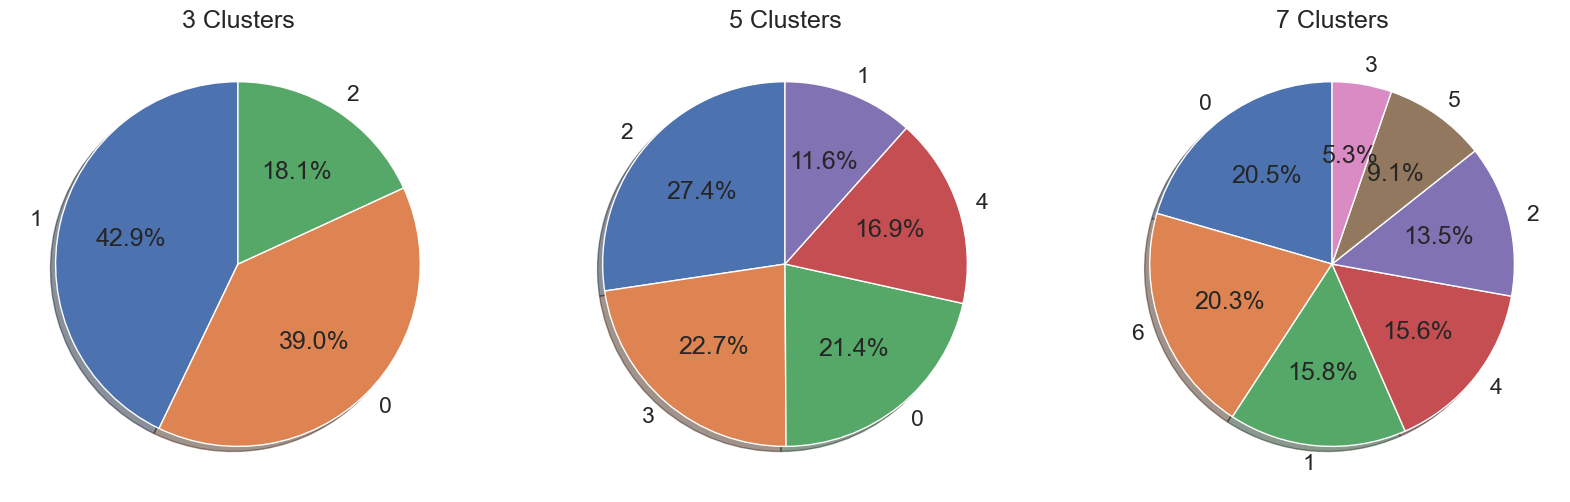

In [34]:
customer_history_df['clusters_3'] = cluster_centers[3]['labels'] 
customer_history_df['clusters_5'] = cluster_centers[5]['labels']
customer_history_df['clusters_7'] = cluster_centers[7]['labels']
display(customer_history_df.head())

fig = plt.figure(figsize=(20,7))
f1 = fig.add_subplot(131)
market = customer_history_df.clusters_3.value_counts()
g = plt.pie(market, labels=market.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('3 Clusters')
f1 = fig.add_subplot(132)
market = customer_history_df.clusters_5.value_counts()
g = plt.pie(market, labels=market.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('5 Clusters')
f1 = fig.add_subplot(133)
market = customer_history_df.clusters_7.value_counts()
g = plt.pie(market, labels=market.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('7 Clusters')
plt.show()

In [35]:
x_data = ['Cluster 0', 'Cluster 1','Cluster 2','Cluster 3','Cluster 4', 'Cluster 5', 'Cluster 6']
colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 
          'rgba(22, 80, 57, 0.5)', 'rgba(127, 65, 14, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
cutoff_quantile = 95

for n_clusters in range(3,K_best+1,2):
    cl = 'clusters_' + str(n_clusters)
    for fild in range(0, 3):
        field_to_plot = features[fild]        
        y_data = list()
        ymax = 0
        for i in np.arange(0,n_clusters):
            y0 = customer_history_df[customer_history_df[cl]==i][field_to_plot].values
            y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
            if ymax < max(y0): ymax = max(y0)
            y_data.insert(i, y0)

        traces = []

        for xd, yd, cls in zip(x_data[:n_clusters], y_data, colors[:n_clusters]):
                traces.append(go.Box(y=yd, name=xd, boxpoints=False, jitter=0.5, whiskerwidth=0.2, fillcolor=cls,
                    marker=dict( size=1, ),
                    line=dict(width=1),
                ))

        layout = go.Layout(
            title='Difference in {} with {} Clusters and {:1.2f} Score'.\
            format(field_to_plot, n_clusters, cluster_centers[n_clusters]['silhouette_score']),
            yaxis=dict( autorange=True, showgrid=True, zeroline=True,
                dtick = int(ymax/10),
                gridcolor='black', gridwidth=0.1, zerolinecolor='rgb(255, 255, 255)', zerolinewidth=2, ),
            margin=dict(l=40, r=30, b=50, t=50, ),
            paper_bgcolor='white',
            plot_bgcolor='white',
            showlegend=False
        )

        fig = go.Figure(data=traces, layout=layout)
        py.offline.iplot(fig)

#### Market Basket Analysis

In [47]:
df.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Revenue  \
0 2010-12-01 08:26:00       2.55       17850  United Kingdom    15.30   
1 2010-12-01 08:26:00       3.39       17850  United Kingdom    20.34   
2 2010-12-01 08:26:00       2.75       17850  United Kingdom    22.00   
3 2010-12-01 08:26:00       3.39       17850  United Kingdom    20.34   
4 2010-12-01 08:26:00       3.39       17850  United Kingdom    20.34   

  Internal  Days since purchase  
0      Yes                  374  
1      Yes                  374  
2      Yes                  374  
3      Yes                  374  
4      Yes                  374

In [48]:
product_info = df.groupby("Description")['Revenue'].sum().reset_index()
product_info.head(5)

Description  Revenue
0   4 PURPLE FLOCK DINNER CANDLES   270.76
1   50'S CHRISTMAS GIFT BAG LARGE  2302.25
2               DOLLY GIRL BEAKER  2759.50
3     I LOVE LONDON MINI BACKPACK  1458.15
4         NINE DRAWER OFFICE TIDY   792.85

In [49]:
# need better sorted item list

product_info.sort_values(by= "Revenue", ascending= False)
items = list(product_info["Description"].unique())
grouped_invoices = df.groupby('InvoiceNo')
transaction_level = grouped_invoices.aggregate(lambda x: tuple(x)).reset_index()[['InvoiceNo','Description']]


I think the best way is to index it and retrieve based on the list to keep things genrally clean (storing the tags is a nightmare)

In [50]:
item_dict = {i: items[i] for i in range(len(items))}
invoice_dict = transaction_level['InvoiceNo'].to_dict()
item_dict

{0: ' 4 PURPLE FLOCK DINNER CANDLES',
 1: " 50'S CHRISTMAS GIFT BAG LARGE",
 2: ' DOLLY GIRL BEAKER',
 3: ' I LOVE LONDON MINI BACKPACK',
 4: ' NINE DRAWER OFFICE TIDY',
 5: ' OVAL WALL MIRROR DIAMANTE ',
 6: ' RED SPOT GIFT BAG LARGE',
 7: ' SET 2 TEA TOWELS I LOVE LONDON ',
 8: ' SPACEBOY BABY GIFT SET',
 9: ' TRELLIS COAT RACK',
 10: '10 COLOUR SPACEBOY PEN',
 11: '12 COLOURED PARTY BALLOONS',
 12: '12 DAISY PEGS IN WOOD BOX',
 13: '12 EGG HOUSE PAINTED WOOD',
 14: '12 HANGING EGGS HAND PAINTED',
 15: '12 IVORY ROSE PEG PLACE SETTINGS',
 16: '12 MESSAGE CARDS WITH ENVELOPES',
 17: '12 PENCIL SMALL TUBE WOODLAND',
 18: '12 PENCILS SMALL TUBE RED RETROSPOT',
 19: '12 PENCILS SMALL TUBE SKULL',
 20: '12 PENCILS TALL TUBE POSY',
 21: '12 PENCILS TALL TUBE RED RETROSPOT',
 22: '12 PENCILS TALL TUBE SKULLS',
 23: '12 PENCILS TALL TUBE WOODLAND',
 24: '12 PINK HEN+CHICKS IN BASKET',
 25: '12 PINK ROSE PEG PLACE SETTINGS',
 26: '12 RED ROSE PEG PLACE SETTINGS',
 27: '15 PINK FLUFFY CHICKS I

We need a 2 dimensional numpy array of zeros that will store the results. Easy peasy.
Then we will go thru every invoice, and tick off the matching ones.

In [51]:
len(transaction_level), len(item_dict)

(18532, 3647)

In [52]:
import numpy as np 
invoice_item_array = np.zeros((len(transaction_level), len(item_dict)), dtype= int)

reversed_item_dict = {}
for key, value in item_dict.items():
    reversed_item_dict[value] = key

for i in range(len(transaction_level)):
    for item in transaction_level.iloc[i]['Description']:
        if item in reversed_item_dict.keys():
            item_index = reversed_item_dict[item]
            invoice_item_array[i][item_index] = 1



In [53]:
transaction_df = pd.DataFrame(invoice_item_array, columns= reversed_item_dict.keys())
transaction_df.head(3)

4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
0                               0                               0   
1                               0                               0   
2                               0                               0   

    DOLLY GIRL BEAKER   I LOVE LONDON MINI BACKPACK   NINE DRAWER OFFICE TIDY  \
0                   0                             0                         0   
1                   0                             0                         0   
2                   0                             0                         0   

    OVAL WALL MIRROR DIAMANTE    RED SPOT GIFT BAG LARGE  \
0                            0                         0   
1                            0                         0   
2                            0                         0   

    SET 2 TEA TOWELS I LOVE LONDON    SPACEBOY BABY GIFT SET  \
0                                 0                        0   
1                                 0                        0   
2                                 0                        0   

    TRELLIS COAT RACK  ...  ZINC HERB GARDEN CONTAINER  \
0                   0  ...                           0   
1                   0  ...                           0   
2                   0  ...                           0   

   ZINC METAL HEART DECORATION  ZINC SWEETHEART SOAP DISH  \
0                            0                          0   
1                            0                          0   
2                            0                          0   

   ZINC SWEETHEART WIRE LETTER RACK  ZINC T-LIGHT HOLDER STAR LARGE  \
0                                 0                               0   
1                                 0                               0   
2                                 0                               0   

   ZINC T-LIGHT HOLDER STARS SMALL  ZINC TOP  2 DOOR WOODEN SHELF   \
0                                0                               0   
1                                0                               0   
2                                0                               0   

   ZINC WILLIE WINKIE  CANDLE STICK  ZINC WIRE KITCHEN ORGANISER  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   

   ZINC WIRE SWEETHEART LETTER TRAY  
0                                 0  
1                                 0  
2                                 0  

[3 rows x 3647 columns]

In [54]:
def prune_dataset(input_df, length_trans= 2, total_sales_perc= 0.5,
                   start_item= 0, end_item= 0, TopCols= None):
    if 'total_items' in input_df.columns:
        del(input_df['total_items'])
    item_count = input_df.sum().sort_values(ascending= False).reset_index()
    total_items = sum(input_df.sum().sort_values(ascending= False))
    item_count.rename(columns= {item_count.columns[0]: 'item_name', 
                                item_count.columns[1]: 'item_count'}, inplace= True)
    if TopCols:
        input_df['total_items'] = input_df[TopCols].sum(axis= 1)
        input_df = input_df[input_df['total_items'] >= length_trans]
        del(input_df['total_items'])
        return input_df[TopCols], item_count[item_count['item_name'].isin(TopCols)]
    elif end_item > start_item:
        selected_items = list(items[start_item: end_item])
        input_df['total_items'] = input_df[selected_items].sum(axis= 1)
        input_df = input_df[input_df['total_items'] >= length_trans]
        del(input_df['total_items'])
        return input_df[selected_items], item_count[start_item: end_item]
    else:
        item_count['item_perc'] = item_count['item_count'] / total_items
        item_count['total_perc'] = item_count['item_perc'].cumsum()
        selected_items = list(item_count[item_count['total_perc'] < total_sales_perc]['item_name'])
        input_df['total_items'] = input_df[selected_items].sum(axis= 1)
        input_df = input_df[input_df['total_items'] >= length_trans]
        
        return input_df[selected_items], item_count[item_count['total_perc'] < total_sales_perc]

In [55]:
output_df, item_counts = prune_dataset(input_df= transaction_df, 
                                       length_trans= 2, total_sales_perc= 0.1)

print(len(output_df), len(transaction_df))

8374 18532


In [56]:
from mlxtend.frequent_patterns import fpgrowth, association_rules

In [57]:
output_df_bool = output_df.astype(bool)
output_df_bool.head(5)

WHITE HANGING HEART T-LIGHT HOLDER  REGENCY CAKESTAND 3 TIER  \
5                                False                     False   
8                                 True                     False   
10                                True                     False   
13                               False                     False   
15                               False                     False   

    JUMBO BAG RED RETROSPOT  PARTY BUNTING  ASSORTED COLOUR BIRD ORNAMENT  \
5                     False          False                          False   
8                     False          False                          False   
10                    False          False                          False   
13                    False          False                          False   
15                    False          False                          False   

    LUNCH BAG RED RETROSPOT  SET OF 3 CAKE TINS PANTRY DESIGN   POSTAGE  \
5                     False                              False     True   
8                     False                              False    False   
10                    False                              False    False   
13                     True                              False    False   
15                    False                              False    False   

    JUMBO BAG VINTAGE DOILY   LUNCH BAG  BLACK SKULL.  ...  \
5                      False                    False  ...   
8                      False                    False  ...   
10                     False                    False  ...   
13                     False                    False  ...   
15                     False                    False  ...   

    SET OF 4 PANTRY JELLY MOULDS  REX CASH+CARRY JUMBO SHOPPER  \
5                          False                         False   
8                          False                         False   
10                         False                         False   
13                         False                         False   
15                         False                         False   

    BAKING SET 9 PIECE RETROSPOT   RECIPE BOX PANTRY YELLOW DESIGN  \
5                           False                            False   
8                           False                            False   
10                          False                            False   
13                          False                            False   
15                          False                            False   

    RETROSPOT TEA SET CERAMIC 11 PC   LUNCH BAG WOODLAND  \
5                              False               False   
8                              False               False   
10                             False               False   
13                             False               False   
15                              True               False   

    VICTORIAN GLASS HANGING T-LIGHT  WOODEN FRAME ANTIQUE WHITE   \
5                             False                        False   
8                             False                         True   
10                            False                         True   
13                            False                        False   
15                            False                        False   

    HEART OF WICKER LARGE  RABBIT NIGHT LIGHT  
5                   False               False  
8                   False               False  
10                  False               False  
13                  False               False  
15                  False               False  

[5 rows x 37 columns]

In [58]:
frequent_itemset = fpgrowth(output_df_bool, min_support= 0.05, use_colnames= True)
frequent_itemset

support                                           itemsets
0   0.087294                        (ALARM CLOCK BAKELIKE RED )
1   0.082278                                          (POSTAGE)
2   0.196083               (WHITE HANGING HEART T-LIGHT HOLDER)
3   0.098877                (WOODEN PICTURE FRAME WHITE FINISH)
4   0.089324                      (WOODEN FRAME ANTIQUE WHITE )
5   0.149869                          (LUNCH BAG RED RETROSPOT)
6   0.107953                  (PACK OF 72 RETROSPOT CAKE CASES)
7   0.095176                          (JUMBO BAG PINK POLKADOT)
8   0.088369                  (PAPER CHAIN KIT 50'S CHRISTMAS )
9   0.083950                 (RETROSPOT TEA SET CERAMIC 11 PC )
10  0.101146                            (HEART OF WICKER SMALL)
11  0.099355                  (NATURAL SLATE HEART CHALKBOARD )
12  0.088727                            (HEART OF WICKER LARGE)
13  0.097206                         (JAM MAKING SET WITH JARS)
14  0.094101                           (JAM MAKING SET PRINTED)
15  0.170050                          (JUMBO BAG RED RETROSPOT)
16  0.105804                                   (POPCORN HOLDER)
17  0.137210                    (ASSORTED COLOUR BIRD ORNAMENT)
18  0.115118                       (LUNCH BAG SPACEBOY DESIGN )
19  0.109506                          (LUNCH BAG PINK POLKADOT)
20  0.095892                               (LUNCH BAG WOODLAND)
21  0.122164                           (LUNCH BAG SUKI DESIGN )
22  0.121806                          (LUNCH BAG  BLACK SKULL.)
23  0.112491                              (LUNCH BAG CARS BLUE)
24  0.076905                  (VICTORIAN GLASS HANGING T-LIGHT)
25  0.082278                     (REX CASH+CARRY JUMBO SHOPPER)
26  0.161572                         (REGENCY CAKESTAND 3 TIER)
27  0.092071                  (RECIPE BOX PANTRY YELLOW DESIGN)
28  0.140554                                    (PARTY BUNTING)
29  0.123000                (SET OF 3 CAKE TINS PANTRY DESIGN )
30  0.088488                    (BAKING SET 9 PIECE RETROSPOT )
31  0.094698                     (SET OF 4 PANTRY JELLY MOULDS)
32  0.099713                           (LUNCH BAG APPLE DESIGN)
33  0.109147                                   (SPOTTY BUNTING)
34  0.116909                         (LUNCH BAG VINTAGE DOILY )
35  0.120134                         (JUMBO BAG VINTAGE DOILY )
36  0.072725                               (RABBIT NIGHT LIGHT)
37  0.055887  (WOODEN PICTURE FRAME WHITE FINISH, WOODEN FRA...
38  0.050752  (JUMBO BAG RED RETROSPOT, LUNCH BAG RED RETROS...
39  0.065202  (JUMBO BAG RED RETROSPOT, JUMBO BAG PINK POLKA...
40  0.055768  (LUNCH BAG SPACEBOY DESIGN , LUNCH BAG RED RET...
41  0.053380  (LUNCH BAG SUKI DESIGN , LUNCH BAG SPACEBOY DE...
42  0.062455  (LUNCH BAG PINK POLKADOT, LUNCH BAG RED RETROS...
43  0.055410  (LUNCH BAG  BLACK SKULL., LUNCH BAG PINK POLKA...
44  0.050991     (LUNCH BAG PINK POLKADOT, LUNCH BAG CARS BLUE)
45  0.051708      (LUNCH BAG RED RETROSPOT, LUNCH BAG WOODLAND)
46  0.061978  (LUNCH BAG SUKI DESIGN , LUNCH BAG RED RETROSPOT)
47  0.055529  (LUNCH BAG  BLACK SKULL., LUNCH BAG SUKI DESIGN )
48  0.061739  (LUNCH BAG  BLACK SKULL., LUNCH BAG RED RETROS...
49  0.053977      (LUNCH BAG SUKI DESIGN , LUNCH BAG CARS BLUE)
50  0.050275     (LUNCH BAG  BLACK SKULL., LUNCH BAG CARS BLUE)
51  0.054813     (LUNCH BAG RED RETROSPOT, LUNCH BAG CARS BLUE)
52  0.052902  (JUMBO BAG VINTAGE DOILY , LUNCH BAG VINTAGE D...
53  0.050036  (LUNCH BAG RED RETROSPOT, LUNCH BAG VINTAGE DO...
54  0.055887  (JUMBO BAG RED RETROSPOT, JUMBO BAG VINTAGE DO...

In [59]:
rules = association_rules(frequent_itemset, metric= 'confidence', min_threshold= 0.3)
rules

antecedents                          consequents  \
0   (WOODEN PICTURE FRAME WHITE FINISH)        (WOODEN FRAME ANTIQUE WHITE )   
1         (WOODEN FRAME ANTIQUE WHITE )  (WOODEN PICTURE FRAME WHITE FINISH)   
2             (LUNCH BAG RED RETROSPOT)            (JUMBO BAG RED RETROSPOT)   
3             (JUMBO BAG RED RETROSPOT)            (JUMBO BAG PINK POLKADOT)   
4             (JUMBO BAG PINK POLKADOT)            (JUMBO BAG RED RETROSPOT)   
5          (LUNCH BAG SPACEBOY DESIGN )            (LUNCH BAG RED RETROSPOT)   
6             (LUNCH BAG RED RETROSPOT)         (LUNCH BAG SPACEBOY DESIGN )   
7              (LUNCH BAG SUKI DESIGN )         (LUNCH BAG SPACEBOY DESIGN )   
8          (LUNCH BAG SPACEBOY DESIGN )             (LUNCH BAG SUKI DESIGN )   
9             (LUNCH BAG PINK POLKADOT)            (LUNCH BAG RED RETROSPOT)   
10            (LUNCH BAG RED RETROSPOT)            (LUNCH BAG PINK POLKADOT)   
11            (LUNCH BAG  BLACK SKULL.)            (LUNCH BAG PINK POLKADOT)   
12            (LUNCH BAG PINK POLKADOT)            (LUNCH BAG  BLACK SKULL.)   
13            (LUNCH BAG PINK POLKADOT)                (LUNCH BAG CARS BLUE)   
14                (LUNCH BAG CARS BLUE)            (LUNCH BAG PINK POLKADOT)   
15            (LUNCH BAG RED RETROSPOT)                 (LUNCH BAG WOODLAND)   
16                 (LUNCH BAG WOODLAND)            (LUNCH BAG RED RETROSPOT)   
17             (LUNCH BAG SUKI DESIGN )            (LUNCH BAG RED RETROSPOT)   
18            (LUNCH BAG RED RETROSPOT)             (LUNCH BAG SUKI DESIGN )   
19            (LUNCH BAG  BLACK SKULL.)             (LUNCH BAG SUKI DESIGN )   
20             (LUNCH BAG SUKI DESIGN )            (LUNCH BAG  BLACK SKULL.)   
21            (LUNCH BAG  BLACK SKULL.)            (LUNCH BAG RED RETROSPOT)   
22            (LUNCH BAG RED RETROSPOT)            (LUNCH BAG  BLACK SKULL.)   
23             (LUNCH BAG SUKI DESIGN )                (LUNCH BAG CARS BLUE)   
24                (LUNCH BAG CARS BLUE)             (LUNCH BAG SUKI DESIGN )   
25            (LUNCH BAG  BLACK SKULL.)                (LUNCH BAG CARS BLUE)   
26                (LUNCH BAG CARS BLUE)            (LUNCH BAG  BLACK SKULL.)   
27            (LUNCH BAG RED RETROSPOT)                (LUNCH BAG CARS BLUE)   
28                (LUNCH BAG CARS BLUE)            (LUNCH BAG RED RETROSPOT)   
29           (JUMBO BAG VINTAGE DOILY )           (LUNCH BAG VINTAGE DOILY )   
30           (LUNCH BAG VINTAGE DOILY )           (JUMBO BAG VINTAGE DOILY )   
31            (LUNCH BAG RED RETROSPOT)           (LUNCH BAG VINTAGE DOILY )   
32           (LUNCH BAG VINTAGE DOILY )            (LUNCH BAG RED RETROSPOT)   
33            (JUMBO BAG RED RETROSPOT)           (JUMBO BAG VINTAGE DOILY )   
34           (JUMBO BAG VINTAGE DOILY )            (JUMBO BAG RED RETROSPOT)   

    antecedent support  consequent support   support  confidence      lift  \
0             0.098877            0.089324  0.055887    0.565217  6.327714   
1             0.089324            0.098877  0.055887    0.625668  6.327714   
2             0.149869            0.170050  0.050752    0.338645  1.991444   
3             0.170050            0.095176  0.065202    0.383427  4.028629   
4             0.095176            0.170050  0.065202    0.685069  4.028629   
5             0.115118            0.149869  0.055768    0.484440  3.232430   
6             0.149869            0.115118  0.055768    0.372112  3.232430   
7             0.122164            0.115118  0.053380    0.436950  3.795664   
8             0.115118            0.122164  0.053380    0.463693  3.795664   
9             0.109506            0.149869  0.062455    0.570338  3.805586   
10            0.149869            0.109506  0.062455    0.416733  3.805586   
11            0.121806            0.109506  0.055410    0.454902  4.154143   
12            0.109506            0.121806  0.055410    0.505998  4.154143   
13            0.109506            0.112491  0.050991   